In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
books = pd.read_csv('./data/books_final.csv')
authors = pd.read_csv('./data/author_final.csv')

In [3]:
books.head(5)

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role
0,54333,食品の混ぜ物処理および調理の毒物（1820）,1657,https://www.aozora.gr.jp/cards/001657/files/54...,NaN,80156.0,著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...,NDC 588,新字新仮名,NaN,著者
1,46340,ファラデーの伝,1234,https://www.aozora.gr.jp/cards/001234/files/46...,NaN,76104.0,［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...,NDC 289,新字新仮名,NaN,著者
2,46511,一片の石,1245,https://www.aozora.gr.jp/cards/001245/files/46...,NaN,2975.0,人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...,NDC 914,新字旧仮名,NaN,著者
3,57975,音楽に就いて,1245,https://www.aozora.gr.jp/cards/001245/files/57...,1922.0,2516.0,既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...,NDC 914,旧字旧仮名,41.0,著者
4,57976,学規,1245,https://www.aozora.gr.jp/cards/001245/files/57...,NaN,585.0,古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...,NDC 914,旧字旧仮名,NaN,著者


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17370 non-null  int64  
 1   title        17370 non-null  object 
 2   author_id    17370 non-null  int64  
 3   url          17370 non-null  object 
 4   inception    10639 non-null  float64
 5   char_count   17370 non-null  float64
 6   text         17370 non-null  object 
 7   category     16801 non-null  object 
 8   char_type    17370 non-null  object 
 9   authorAge    10564 non-null  float64
 10  author_role  17370 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.5+ MB


In [4]:
def nulls(df: pd.DataFrame):
    return pd.DataFrame({
        'cols': df.columns,
        "null_count": df.isna().sum().values,
        '% null': np.round(df.isna().sum().values / len(df) * 100, 3)
    }).sort_values(by='null_count', ascending=False).reset_index(drop=True)

In [7]:
nulls(books)

,cols,null_count,% null
0,authorAge,6806,39.182
1,inception,6731,38.751
2,category,569,3.276
3,author_id,0,0.000
4,title,0,0.000
5,id,0,0.000
6,url,0,0.000
7,text,0,0.000
8,char_count,0,0.000
9,char_type,0,0.000


In [8]:
books.describe(include='float')

,inception,char_count,authorAge
count,10639.000000,17370.000000,10564.000000
mean,1932.344487,13456.169315,42.385744
std,20.681545,34426.686869,13.318430
min,712.000000,14.000000,12.000000
25%,1924.000000,1531.250000,32.000000
50%,1933.000000,4314.000000,41.000000
75%,1942.000000,11550.500000,51.000000
max,2022.000000,823518.000000,91.000000


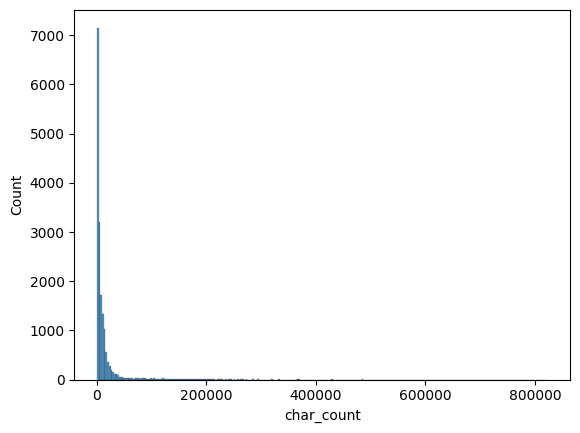

In [11]:
sns.histplot(books['char_count']);

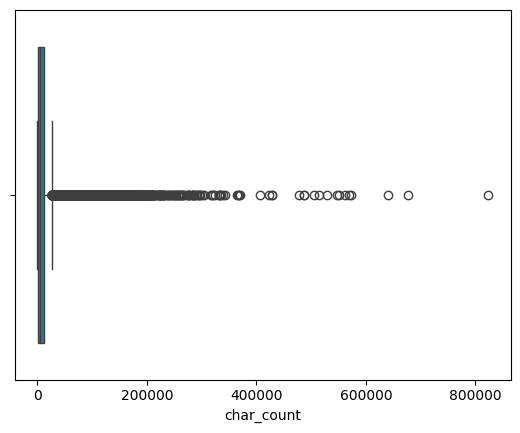

In [12]:
sns.boxplot(books, x='char_count');

There is a lot of variance in terms of `character count`, so I'll split into categories.

Each will hold around 25% of the data:

- `flash`: [0, 1500)
- `shortshort`: [1500, 4000)
- `short`: [400, 12000)
- `novel`: 12000+

In [437]:
num_of_chars = [0, 1500, 4000, 12000, 1000000]
categories = ['flash', 'shortshort', 'short', 'novel']
books['length_type'] = pd.cut(books['char_count'], num_of_chars, labels=categories)

In [18]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

,0,1
0,flash,4268
1,novel,4147
2,short,4897
3,shortshort,4058


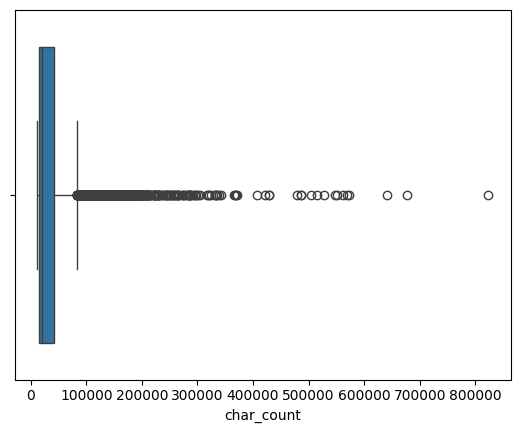

In [23]:
novels = books[books['length_type'] == 'novel']

sns.boxplot(novels, x='char_count');

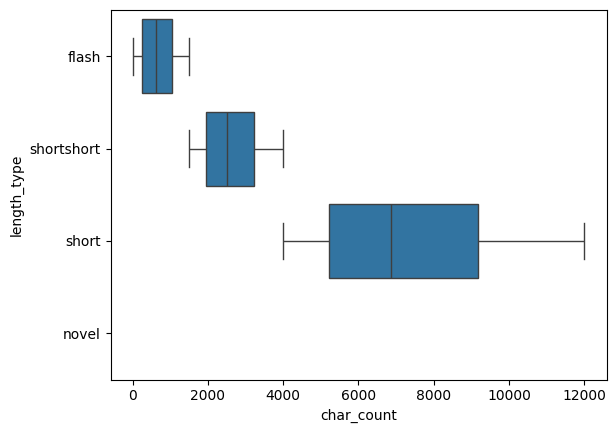

In [22]:
non_novels = books[~(books['length_type'] == 'novel')]

sns.boxplot(non_novels, x='char_count', y='length_type');

I'm going to add another bin between `short` and `novel` so that they have less variance.

In [5]:
num_of_chars = [0, 1500, 4000, 12000, 24000, 1000000]
categories = ['flash', 'shortshort', 'short', 'novelette', 'novel']
books['length_type'] = pd.cut(books['char_count'], num_of_chars, labels=categories)

In [41]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

,0,1
0,flash,4268
1,novel,1791
2,novelette,2356
3,short,4897
4,shortshort,4058


In [270]:
books['length_type'] = pd.qcut(books['char_count'], 5, labels=['flash', 'shortshort', 'short', 'novelette', 'novel'])

In [43]:
pd.DataFrame(np.unique_counts(books['length_type'])).T

,0,1
0,flash,3474
1,novel,3474
2,novelette,3474
3,short,3472
4,shortshort,3476


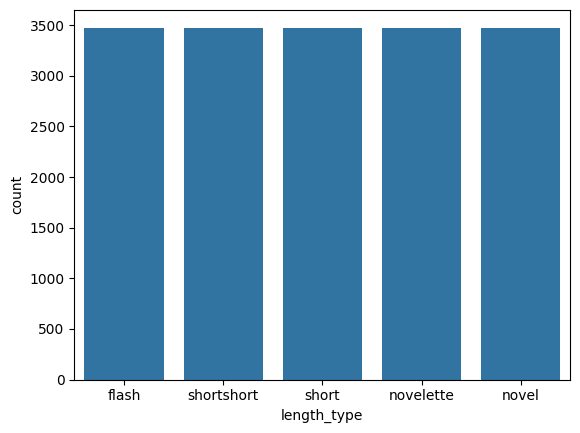

In [55]:
sns.countplot(books, x='length_type');

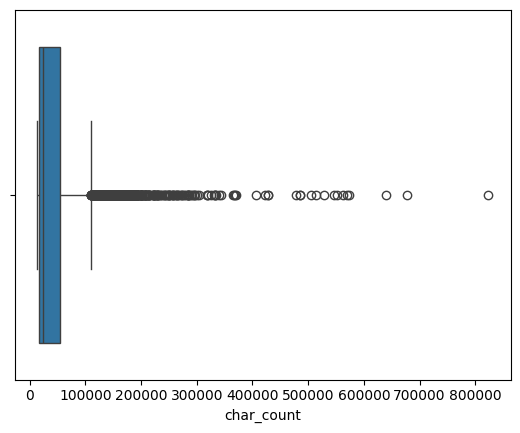

In [44]:
novels = books[books['length_type'] == 'novel']

sns.boxplot(novels, x='char_count');

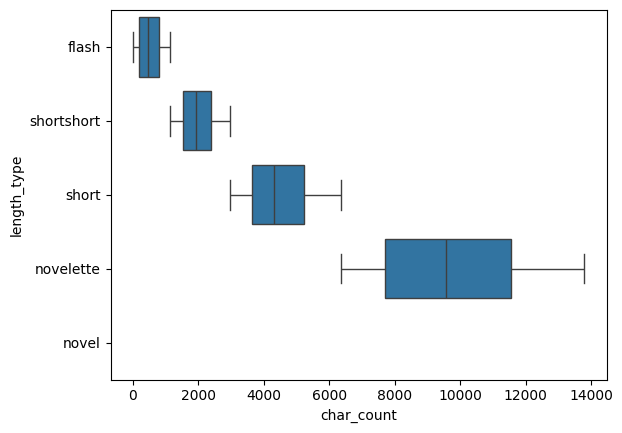

In [45]:
non_novels = books[~(books['length_type'] == 'novel')]

sns.boxplot(non_novels, x='char_count', y='length_type');

In [49]:
d = {}
for type in np.unique_values(books['length_type']):
    d[type] = books[books['length_type'] == type]['char_count'].describe()

pd.DataFrame(d)

,flash,novel,novelette,short,shortshort
count,3474.000000,3474.000000,3474.000000,3472.000000,3476.000000
mean,507.604778,50675.421704,9687.126655,4438.232143,1973.880035
std,341.974140,64346.663773,2172.218763,953.018543,510.660344
min,14.000000,13790.000000,6356.000000,2971.000000,1151.000000
25%,190.000000,17180.500000,7703.500000,3635.000000,1531.750000
50%,451.000000,24713.000000,9555.000000,4314.000000,1928.000000
75%,802.000000,54191.750000,11550.500000,5226.000000,2397.000000
max,1150.000000,823518.000000,13789.000000,6353.000000,2970.000000


Text(0.5, 1.0, 'character count of all non-novels')

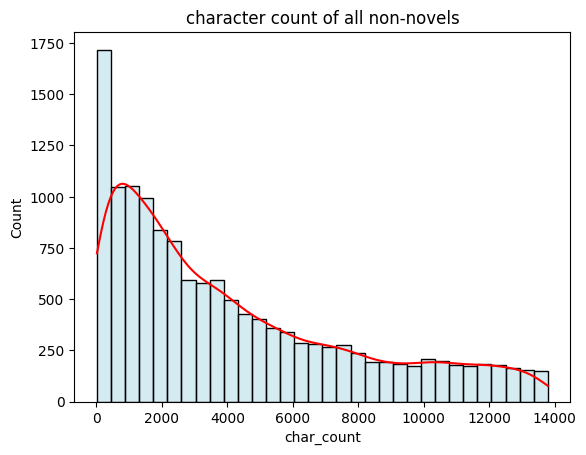

In [ ]:
ax = sns.histplot(non_novels['char_count'], kde=True, color='lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of all non-novels');

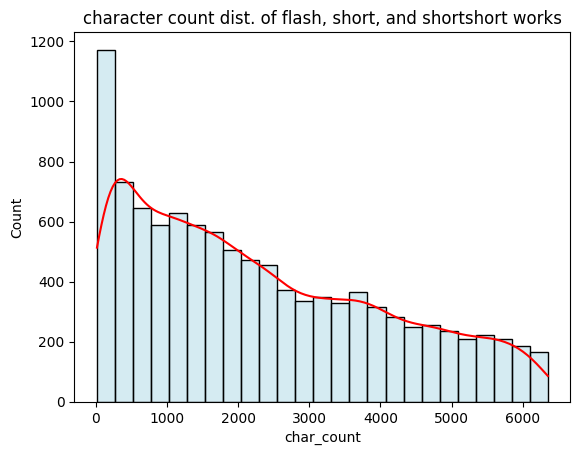

In [58]:
ax = sns.histplot(non_novels[~(non_novels['length_type'] == 'novelette')]['char_count'], kde=True, color='lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count dist. of flash, short, and shortshort works');

Text(0.5, 1.0, 'character count of novels')

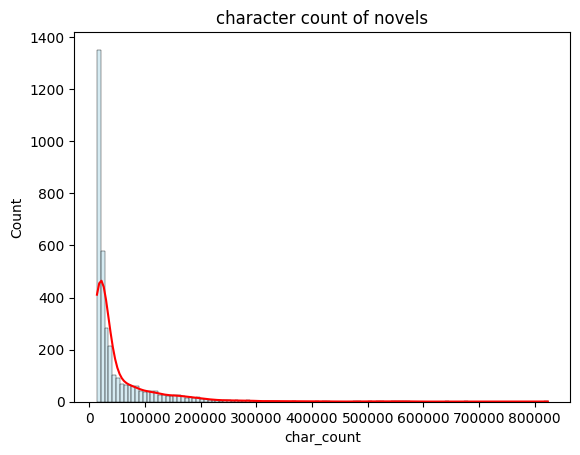

In [ ]:
ax = sns.histplot(novels['char_count'], kde=True, color = 'lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of novels');

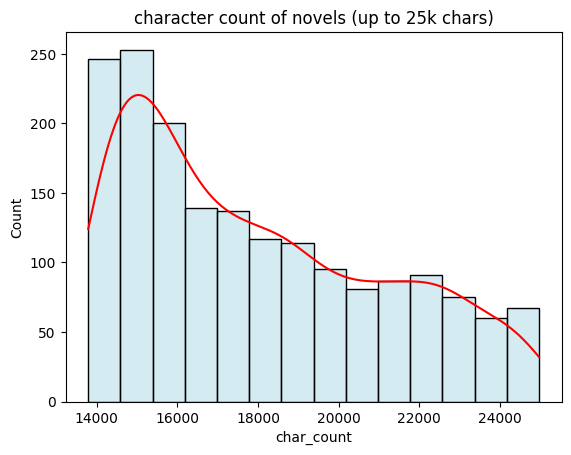

In [61]:
ax = sns.histplot(novels[novels['char_count'] <= 25000]['char_count'], kde=True, color = 'lightblue');
ax.lines[0].set_color('red');
ax.set_title('character count of novels (up to 25k chars)');

As a whole, the dataset seems to have a majority of shorter works (< 10000 chars)

I'm interested to see if this is because a majority of early works are short (maybe due to technological limitations, or perhaps a general lack of literacy to warrant a longer length work).


In [ ]:
count = pd.DataFrame(np.unique_counts(books['inception'].astype(str))).T
count = count[0: 117].rename({1: 'count', 0: 'year'}, axis=1) # slicing to remove the nans

In [77]:
count['year'] = count['year'].astype(float)

In [78]:
count['bins'] = pd.qcut(count['year'], 9)

count

,year,count,bins
0,1331.0,1,"(711.999, 1880.778]"
1,1768.0,1,"(711.999, 1880.778]"
2,1776.0,1,"(711.999, 1880.778]"
3,1854.0,1,"(711.999, 1880.778]"
4,1872.0,2,"(711.999, 1880.778]"
...,...,...,...
112,1997.0,2,"(1980.111, 2022.0]"
113,2016.0,3,"(1980.111, 2022.0]"
114,2019.0,3,"(1980.111, 2022.0]"
115,2022.0,3,"(1980.111, 2022.0]"


In [79]:
counts = pd.DataFrame(count.groupby('bins', as_index=False).sum()[['bins', 'count']]);

counts

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\1040286434.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = pd.DataFrame(count.groupby('bins', as_index=False).sum()[['bins', 'count']]);


,bins,count
0,"(711.999, 1880.778]",30
1,"(1880.778, 1894.778]",153
2,"(1894.778, 1907.667]",451
3,"(1907.667, 1920.556]",1339
4,"(1920.556, 1933.444]",3473
5,"(1933.444, 1946.333]",3022
6,"(1946.333, 1959.222]",1892
7,"(1959.222, 1980.111]",164
8,"(1980.111, 2022.0]",115


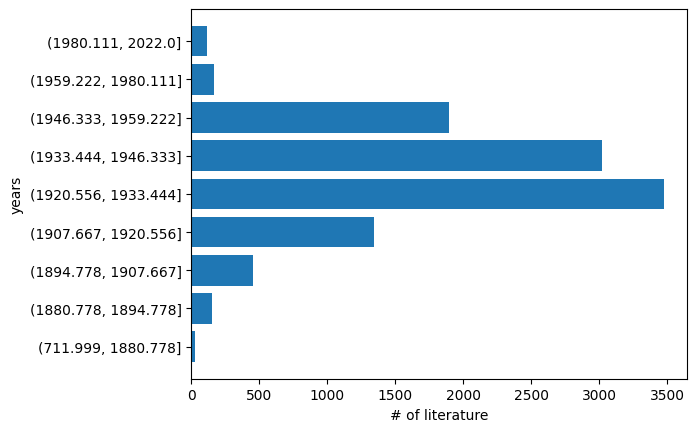

In [80]:
plt.barh(counts.bins.astype(str), counts['count']);
plt.xlabel('# of literature')
plt.ylabel('years')
plt.show()

In [81]:
counts['%_change'] = counts['count'].pct_change() * 100;

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\2214901247.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counts['%_change'] = counts['count'].pct_change() * 100;


In [83]:
counts

,bins,count,%_change
0,"(711.999, 1880.778]",30,NaN
1,"(1880.778, 1894.778]",153,410.000000
2,"(1894.778, 1907.667]",451,194.771242
3,"(1907.667, 1920.556]",1339,196.895787
4,"(1920.556, 1933.444]",3473,159.372666
5,"(1933.444, 1946.333]",3022,-12.985891
6,"(1946.333, 1959.222]",1892,-37.392455
7,"(1959.222, 1980.111]",164,-91.331924
8,"(1980.111, 2022.0]",115,-29.878049


### Categorizing by era:

In [172]:
era_count = count
bins = [0, 1867, 1912, 1926, 1989, 2019]
labels = ['Pre-Meiji', 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_count['bins'] = pd.cut(era_count['year'], bins, labels=labels)

In [173]:
era_count = pd.DataFrame(era_count.groupby('bins', as_index=False).sum()[['bins', 'count']]);

era_count

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\3406830745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_count = pd.DataFrame(era_count.groupby('bins', as_index=False).sum()[['bins', 'count']]);


,bins,count
0,Pre-Meiji,0
1,Meiji,1072
2,Taisho,2454
3,Showa,7091
4,Heisei,14


In [282]:
idx = books[books['inception'] < 1867].index

books = books.drop(index=idx)

In [283]:
count = pd.DataFrame(np.unique_counts(books['inception'].astype(str))).T
count = count[0: 112].rename({1: 'count', 0: 'year'}, axis=1)
count['year'] = count['year'].astype(float)
count

,year,count
0,1872.0,2
1,1873.0,1
2,1874.0,6
3,1875.0,5
4,1876.0,3
...,...,...
107,1995.0,1
108,1997.0,2
109,2016.0,3
110,2019.0,3


In [284]:
era_count = count
bins = [1867, 1912, 1926, 1989, 2022]
labels = [ 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_count['bins'] = pd.cut(era_count['year'], bins, labels=labels)

In [177]:
era_count

,year,count,bins
0,1872.0,2,Meiji
1,1873.0,1,Meiji
2,1874.0,6,Meiji
3,1875.0,5,Meiji
4,1876.0,3,Meiji
...,...,...,...
107,1995.0,1,Heisei
108,1997.0,2,Heisei
109,2016.0,3,Heisei
110,2019.0,3,Heisei


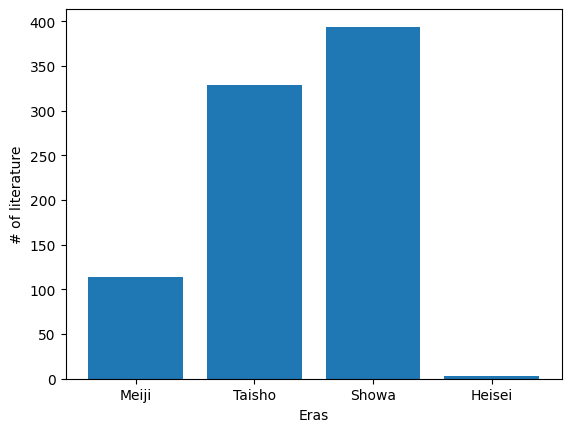

In [285]:
plt.bar(era_count.bins, era_count['count']);
plt.xlabel('Eras');
plt.ylabel('# of literature');
plt.show()

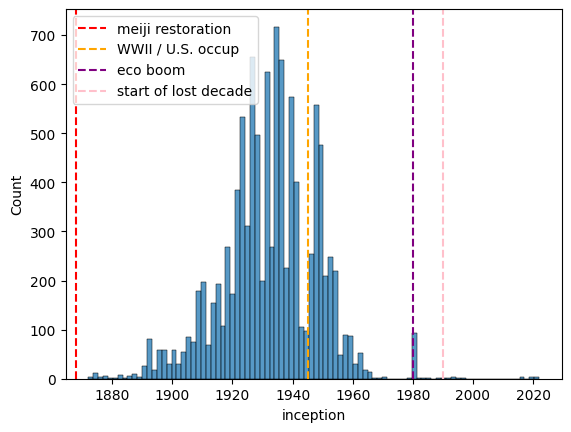

In [179]:
ax = sns.histplot(books['inception']);
meiji_rest = ax.axvline(x=1868, c='red', ls='--')
meiji_rest.set_label('meiji restoration')
WWII = ax.axvline(x=1945, c='orange', ls='--')
WWII.set_label('WWII / U.S. occup')
bubble = ax.axvline(x=1980, c='purple', ls='--')
bubble.set_label('eco boom')
lost = ax.axvline(x=1990, c='pink', ls='--')
lost.set_label('start of lost decade')
ax.legend(loc=2);


In [180]:
def book_count_by_year(book_type):
    df = books[books['length_type'] == book_type]
    ax = sns.histplot(df['inception']);
    meiji_rest = ax.axvline(x=1868, c='red', ls='--')
    meiji_rest.set_label('meiji restoration')
    WWII = ax.axvline(x=1945, c='orange', ls='--')
    WWII.set_label('WWII / U.S. occup')
    ax.legend(loc=2);

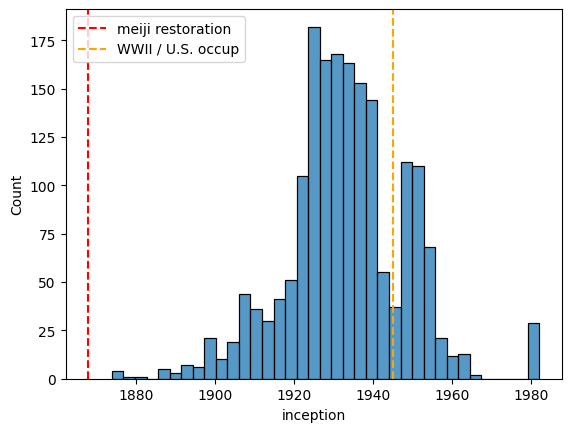

In [181]:
book_count_by_year('flash')

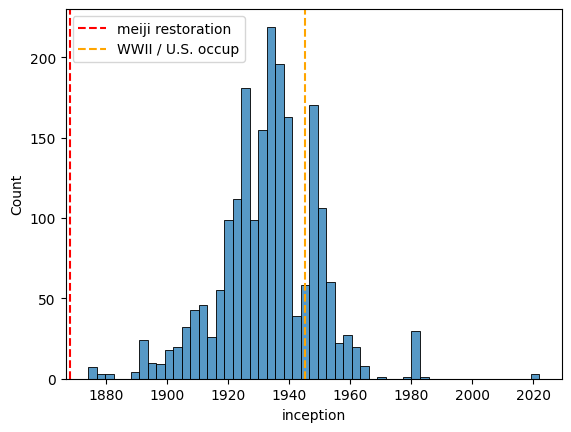

In [182]:
book_count_by_year('shortshort')

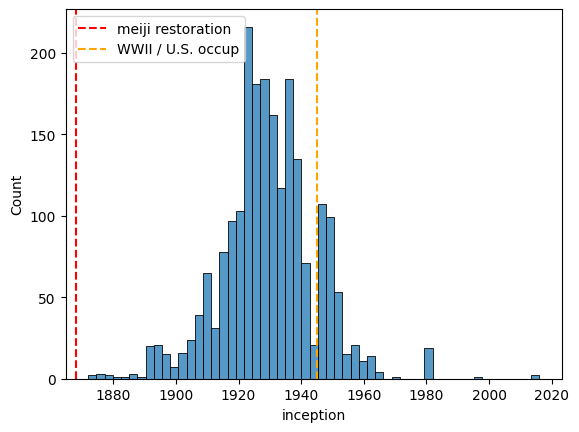

In [183]:
book_count_by_year('short')

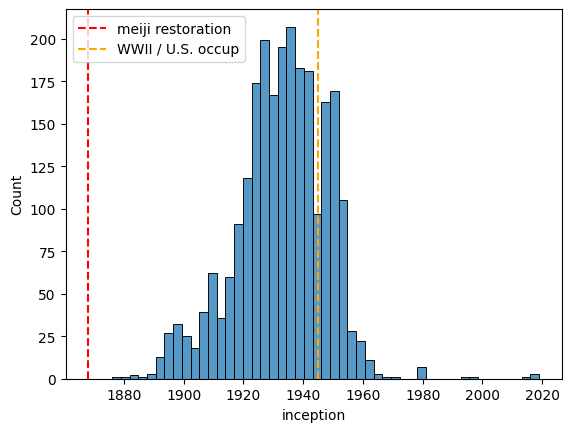

In [184]:
book_count_by_year('novelette')

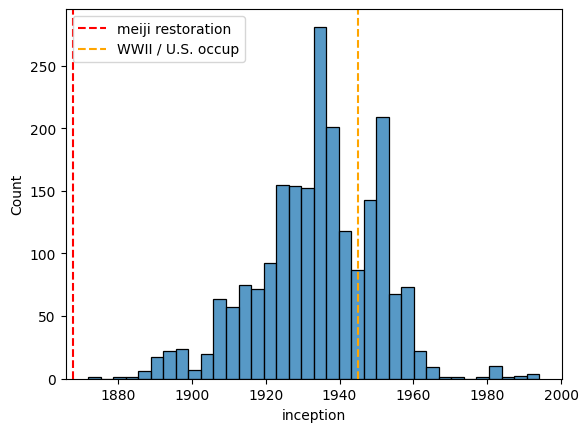

In [185]:
book_count_by_year('novel')

In [186]:
plots = []
for type in np.unique_values(books['length_type'].astype(str)):
    if type != 'nan':
        plots.append(books[books['length_type'] == type]['inception']) 


In [187]:
types = np.unique_values(books['length_type'].astype(str))


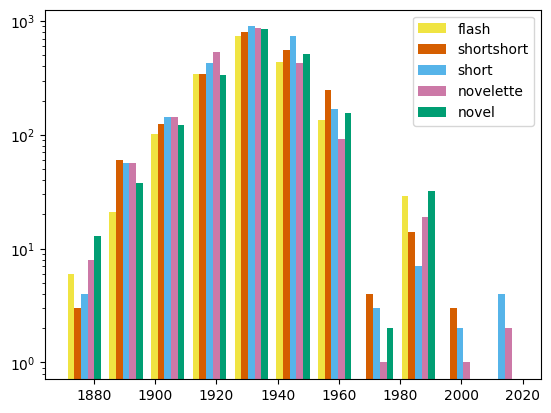

In [200]:
palette_colors = [
    '#F0E442',  # Yellow
    '#D55E00',  # Red-orange
    '#56B4E9',  # Sky blue
    '#CC79A7',  # Pink
    '#009E73',  # Green 
]

bins = np.linspace(1870, 2020,12)
plt.hist(plots, bins=bins, label=['flash', 'shortshort', 'short', 'novelette', 'novel'], log=True, color=palette_colors)
plt.legend(loc='upper right') 
#'flash', 'novel', 'novelette', 'short', 'shortshort'
plt.show()

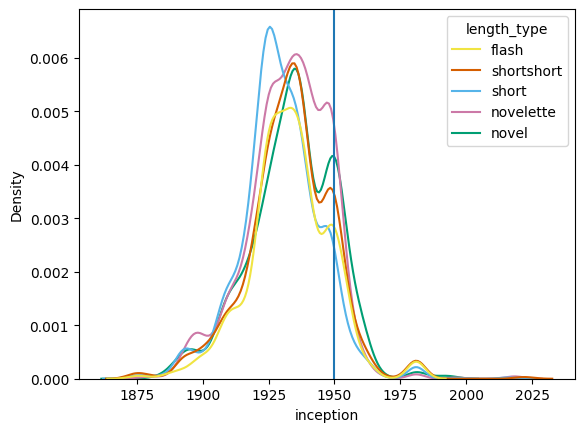

In [203]:
palette_colors = ['#F0E442',  # Yellow
    '#D55E00',  # Red-orange
    '#56B4E9',  # Sky blue
    '#CC79A7',  # Pink
   '#009E73',  # Green 
   ]
ax = sns.kdeplot(books, x = 'inception', hue='length_type', palette=palette_colors);

ax.axvline(1950)

Insights:

- Each book type shares similar trends
  - Drastic increase starting early 1900s, especially after WWI.
  - dip during WWII, with an upsurge following the beginning of U.S. occupation.
  - A very unnatural near-zero count of works during the 1970s.
  - A slight resurge of works during the 1980s.
- `short`s were most prominent between 1920s and 1930, after which it drops the most drastically during WWII, leading to other works becoming more prominent.
- `novelette`s and `novel`s were most prominent between 1935 - 1950, which would align with the Great Depression and WWII. `novelette`'s dip during WWII is much less drastic than the others.
- `shortshort` and `flash`'s distribution seem to be similar to one another, with `shortshort` being clustered around 1930 - 1940.


Limitations:

- As Aozora Bunko is a legal Japanese digital library, it only contains
 1. out-of-copyright books (copyright policy is 70 years after the author's death.)
 2. works that authors wish to make freely available.

- This does explain the drastic decrease starting 1950, (2025 - 70 = 1955) and the absence of works post 1955.
  - What is interesting, however, is the upsurge in works in the 1980s that are present in the library.

##  Taking a peek at the authors.

#### Gender breakdowns

In [425]:
authors.head()

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
0,148.0,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867.0,1916.0,37.0
1,81.0,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896.0,1933.0,25.0
2,35.0,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909.0,1948.0,24.0
3,119.0,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909.0,1942.0,24.0
4,96.0,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889.0,1936.0,30.0


In [426]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              951 non-null    float64
 1   author          951 non-null    object 
 2   birthDate       928 non-null    object 
 3   deathDate       925 non-null    object 
 4   gender          951 non-null    object 
 5   birthPlace      801 non-null    object 
 6   last            951 non-null    object 
 7   first           935 non-null    object 
 8   birthYear       928 non-null    float64
 9   deathYear       925 non-null    float64
 10  first_work_age  611 non-null    float64
dtypes: float64(4), object(7)
memory usage: 81.9+ KB


In [427]:
nulls(authors)

,cols,null_count,% null
0,first_work_age,340,35.752
1,birthPlace,150,15.773
2,deathYear,26,2.734
3,deathDate,26,2.734
4,birthYear,23,2.419
5,birthDate,23,2.419
6,first,16,1.682
7,author,0,0.000
8,id,0,0.000
9,last,0,0.000


In [428]:
authors.describe()

,id,birthYear,deathYear,first_work_age
count,951.000000,928.000000,925.000000,611.000000
mean,1130.383807,1871.177802,1928.160000,36.831424
std,641.934039,116.635408,118.116121,14.516787
min,5.000000,233.000000,297.000000,12.000000
25%,485.500000,1870.750000,1930.000000,25.000000
50%,1245.000000,1885.000000,1944.000000,33.000000
75%,1652.500000,1898.000000,1956.000000,45.000000
max,2402.000000,1986.000000,2016.000000,89.000000


In [429]:
np.unique_values(authors['gender'].astype(str))

array(['female', 'male', 'unknown'], dtype=object)

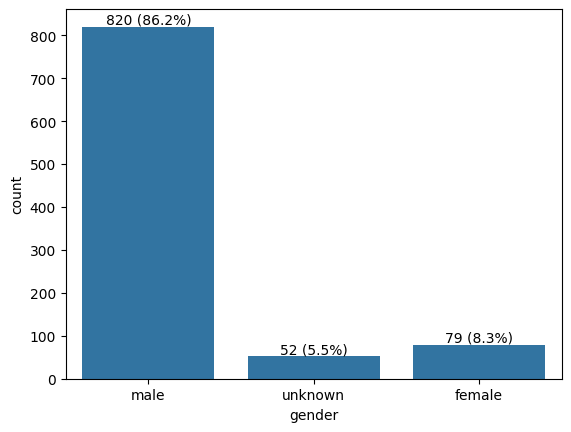

In [410]:
ax = sns.countplot(x=authors['gender'],)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / len(authors)
    ax.text( # to show individual frequencies.
        p.get_x() + p.get_width() / 2.,
        height,                          
        f'{int(height)} ({np.round(percentage,1)}%)',               
        ha='center', va='bottom'         
)

plt.show()

Not many females at all.


In [488]:
female = authors[authors['gender'] == 'female']

female

,author_id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear,first_work_age
27,64.0,樋口一葉,1872-05-02,1896-11-23,female,東京,Higuchi,Ichiyo,1872.0,1896.0,20.0
42,52.0,紫式部,0973-00-00,1014-00-00,female,Heian-kyō,Murasaki Shikibu,NaN,973.0,1014.0,NaN
54,1090.0,オルコットルイーザ・メイ,1832-11-29,1888-03-06,female,Germantown,Alcott,Louisa May,1832.0,1888.0,NaN
65,1176.0,シェリーメアリー・ウォルストンクラフト,1797-08-30,1851-02-01,female,Somers Town,Shelley,Mary Wollstonecraft,1797.0,1851.0,NaN
77,76.0,岡本かの子,1889-03-01,1939-02-18,female,赤坂,Okamoto,Kanoko,1889.0,1939.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
919,1422.0,戸田豊子,1904-01,1956-04-11,female,Japan,戸田,豊子,1904.0,1956.0,25.0
924,2136.0,ノアイユアンナ・ド,1876-11-15,1933-04-30,female,France,ノアイユ,アンナ・ド,1876.0,1933.0,NaN
930,2402.0,ファイルマンローズ,1877-03-06,1957-08-01,female,United Kingdom,ファイルマン,ローズ,1877.0,1957.0,50.0
933,2085.0,間所紗織,1924-05-24,1966-01-31,female,Aichi,間所,紗織,1924.0,1966.0,NaN


In [ ]:
female_ids = female['author_id']

female_works = books[books['author_id'].isin(female_ids)]

female_works

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,length_type,eras
32,59016,現代作家は古典をどうみるか,1990,https://www.aozora.gr.jp/cards/001990/files/59...,NaN,137.0,〔設問〕一明治以前の日本の伝統美術で最も興味をもっているものは何か二その理由芥川紗織一、土偶...,NDC 723,新字新仮名,NaN,著者,flash,NaN
33,59393,「ぴ・い・ぷ・る」,1990,https://www.aozora.gr.jp/cards/001990/files/59...,1956.0,239.0,民話を描くこの一年の間に随分沢山の日本の民話を読みあさりました。古くから語りつがれて来たおは...,NDC 723,新字新仮名,32.0,著者,flash,Showa
34,59502,美容院にのぞむこと,1990,https://www.aozora.gr.jp/cards/001990/files/59...,NaN,189.0,こと容姿に關しては私は恐ろしく小心なのでとても壯麗な美容院に一人で入つて行く勇氣がありません...,NDC 595,旧字新仮名,NaN,著者,flash,NaN
35,59722,表紙絵について,1990,https://www.aozora.gr.jp/cards/001990/files/59...,NaN,240.0,雑誌の表紙は始めてです。何時もと同じ染色の方法で何時もと同じ人間の描き方をしました。乳房のあ...,NDC 723,新字新仮名,NaN,著者,flash,NaN
36,59022,民芸品の部屋で,1990,https://www.aozora.gr.jp/cards/001990/files/59...,1955.0,543.0,前にタマヨの絵を美術雑誌の原色版で見てそのまか不思議な色彩にひどく惹かれました。それ以来私は...,NDC 723,新字新仮名,31.0,著者,flash,Showa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17214,2387,梁上の足,331,https://www.aozora.gr.jp/cards/000331/files/23...,NaN,5475.0,梁上の足若杉鳥子晝間、街から持つて來た昂奮が、夜中私を睡らせなかつた。おまけに、腦天を紛碎し...,NDC 913,旧字旧仮名,NaN,著者,short,NaN
17215,2388,烈日,331,https://www.aozora.gr.jp/cards/000331/files/23...,NaN,2118.0,急坂私が坂を下りやうとした時、下の方から急激な怒號が起つた。罵る叫ぶ叱する、呻く力を張る、そ...,NDC 913,旧字旧仮名,NaN,著者,shortshort,NaN
17216,47137,黄金機会,163,https://www.aozora.gr.jp/cards/000163/files/47...,1893.0,14048.0,上私は二十になつた今日までの生涯にこれぞといつて人さまにお話し申す大事件もなく、父母の膝下に...,NDC K913,新字旧仮名,29.0,著者,novel,Meiji
17217,47138,鼻で鱒を釣つた話（実事）,163,https://www.aozora.gr.jp/cards/000163/files/47...,1893.0,2068.0,みなさん、魚はどういふものを食べたがるか、御承知ですか？。蚯蚓に団子………。さ様、それから生...,NDC K913,新字旧仮名,29.0,著者,shortshort,Meiji


<Axes: xlabel='inception', ylabel='Count'>

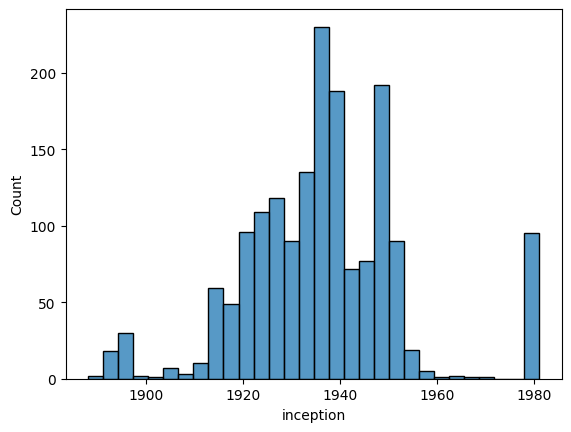

In [493]:
sns.histplot(female_works['inception'])

In [495]:
male = authors[authors['gender'] == 'male']

male_works = books[books['author_id'].isin(male['author_id'])]

male_works.head(5)

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,length_type,eras
0,54333,食品の混ぜ物処理および調理の毒物（1820）,1657,https://www.aozora.gr.jp/cards/001657/files/54...,NaN,80156.0,著者フレデリック・アークム専門化学者、ヨーロッパの主な芸術・科学アカデミーおよび学会の会員緒...,NDC 588,新字新仮名,NaN,著者,novel,NaN
1,46340,ファラデーの伝,1234,https://www.aozora.gr.jp/cards/001234/files/46...,NaN,76104.0,［＃改丁］序偉人の伝記というと、ナポレオンとかアレキサンドロスとか、グラッドストーンというよ...,NDC 289,新字新仮名,NaN,著者,novel,NaN
2,46511,一片の石,1245,https://www.aozora.gr.jp/cards/001245/files/46...,NaN,2975.0,人間が石にたよるやうになつて、もうよほど久しいことであるのに、まだ根気よくそれをやつてゐる。...,NDC 914,新字旧仮名,NaN,著者,short,NaN
3,57975,音楽に就いて,1245,https://www.aozora.gr.jp/cards/001245/files/57...,1922.0,2516.0,既に美育部を持つてゐる早稻田中學校が新に音樂會を興してその發會式をやらうとする其の日から、又...,NDC 914,旧字旧仮名,41.0,著者,shortshort,Taisho
4,57976,学規,1245,https://www.aozora.gr.jp/cards/001245/files/57...,NaN,585.0,古い日記や手紙などを、みんな燒いてしまつたので、こまかに時日をいへないが、まだ若い中學教師で...,NDC 914,旧字旧仮名,NaN,著者,flash,NaN


<Axes: xlabel='inception', ylabel='Count'>

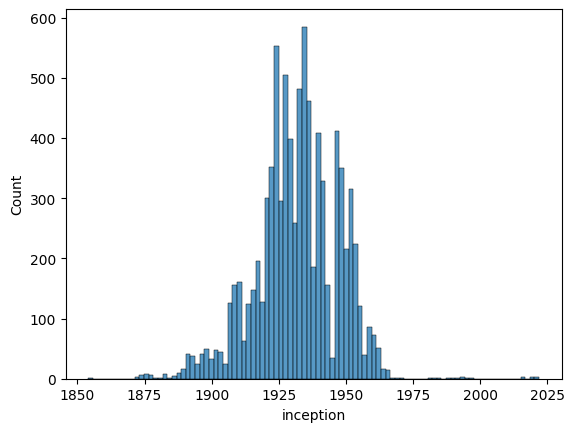

In [498]:
sns.histplot(male_works[male_works['inception'] > 1800]['inception'])

In [506]:
female_works['gender'] = 'female'
male_works['gender'] = 'male'

genders = pd.concat([female_works, male_works], ignore_index=True)

genders = genders[genders['inception'] > 1800]

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\3340822393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_works['gender'] = 'female'
C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\3340822393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_works['gender'] = 'male'


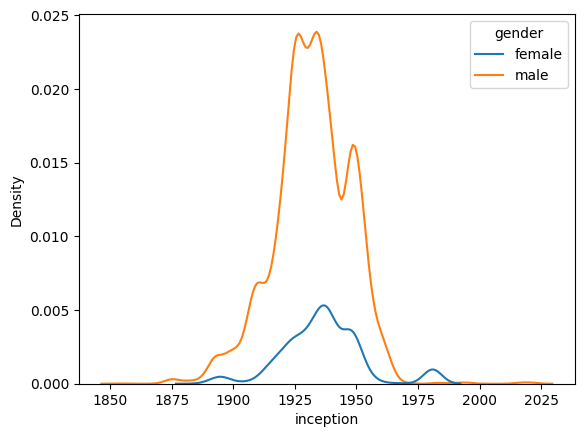

In [ ]:
sns.kdeplot(genders, x = 'inception', hue='gender')

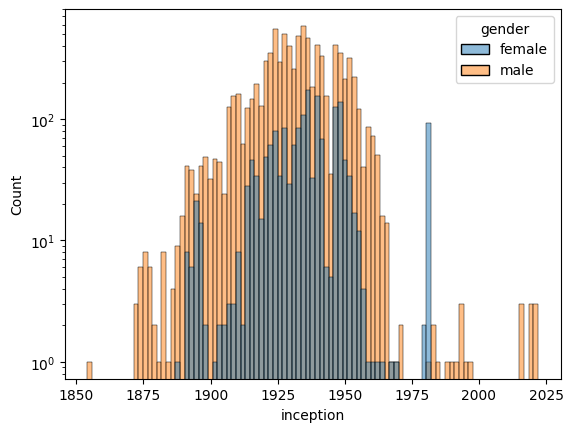

In [515]:
sns.histplot(data=genders, x='inception', hue='gender', multiple='layer')
plt.yscale('log')  # Apply log scale to the Y-axis
plt.show()

- `female` works are delayed, until 1940s before they are similar to `male` works in terms of frequency.
- `female` works are much more prominent compared to `male` works in the 1980s, but a small sample size could definitely be attributing to that.

- both works follow similar trends (clustered around 1900 - 1950, massive dip during WWII, normal-ish distribution)

#### Authors / Era breakdown

In [411]:
count = pd.DataFrame(np.unique_counts(authors['birthYear'].astype(str))).T

count = count[0:138]

count = count.rename(columns={0: 'year', 1: 'count'})
count['year'] = count['year'].astype(float)

In [412]:
count['year'] = count['year'] + 30 # around when most write their first work

In [413]:
era_author_count = count
bins = [1867, 1912, 1926, 1989, 2022]
labels = [ 'Meiji', 'Taisho', 'Showa', 'Heisei']
era_author_count['bins'] = pd.cut(era_author_count['year'], bins, labels=labels)

nulls(era_author_count)

,cols,null_count,% null
0,bins,39,28.261
1,year,0,0.000
2,count,0,0.000


22% of the years are null. This looks deceivingly large, as this only contains unique years of birth. In actuality, 31 / len(authors) = 3% of the authors are outside the years defined.

In [414]:
era_author_count = era_author_count.dropna()

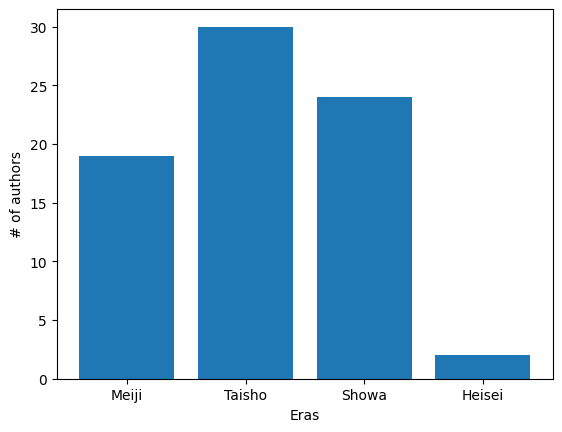

In [415]:
plt.bar(era_author_count.bins, era_author_count['count']);
plt.xlabel('Eras');
plt.ylabel('# of authors');
plt.show()

In [416]:
era_author_count['type'] = 'authors'
era_count['type'] = 'works'

combined = pd.concat([era_author_count, era_count])

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\607867148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era_author_count['type'] = 'authors'


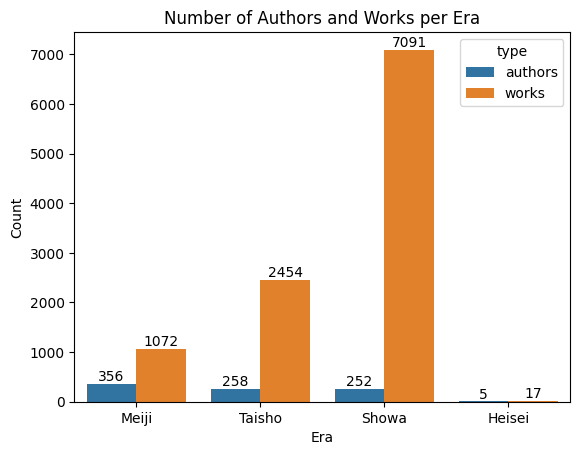

In [417]:
ax = sns.barplot(data=combined, x='bins', y='count', hue='type', errorbar=None,  estimator=np.sum)
plt.xlabel('Era')
plt.ylabel('Count')
plt.title('Number of Authors and Works per Era')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid labels for empty bars
        ax.text(
            p.get_x() + p.get_width() / 2.,  # X position (center of bar)
            height,                          # Y position (top of bar)
            f'{int(height)}',                # The count
            ha='center', va='bottom'
        )

plt.show()


Each author is uniquely counted and will only be in one distinct era.

In terms of `number of authors` per era, it should be cumulative as new, young authors join older authors.

In [418]:
eras = {
    'Meiji': (1868, 1912),
    'Taisho': (1912, 1926),
    'Showa': (1926, 1989),
    'Heisei': (1989, 2019)
}

def assign_eras(birth, death):
    if pd.isnull(death):  
        death = birth

    lived_eras = []
    
    for era, (start, end) in eras.items():
        if birth <= end and death >= start:
            lived_eras.append(era)
    
    return lived_eras

In [419]:
eras_author = authors[['birthYear', 'deathYear']]

In [420]:
eras_author['eras_lived'] = eras_author.apply(
    lambda row: assign_eras(row['birthYear'], row['deathYear']), axis=1
)

C:\Users\Jaden\AppData\Local\Temp\ipykernel_15716\399832303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eras_author['eras_lived'] = eras_author.apply(


In [421]:
exp = eras_author.explode('eras_lived')

era_author_count = pd.DataFrame(exp['eras_lived'].value_counts()).reset_index()

era_author_count = era_author_count.rename(columns={'eras_lived': 'bins'})

era_author_count

,bins,count
0,Meiji,849
1,Taisho,810
2,Showa,748
3,Heisei,2


In [422]:
era_author_count['type'] = 'authors'

combined = pd.concat([era_author_count, era_count])

combined

,bins,count,type,year
0,Meiji,849,authors,NaN
1,Taisho,810,authors,NaN
2,Showa,748,authors,NaN
3,Heisei,2,authors,NaN
0,Meiji,2,works,1872.0
...,...,...,...,...
107,Heisei,1,works,1995.0
108,Heisei,2,works,1997.0
109,Heisei,3,works,2016.0
110,Heisei,3,works,2019.0


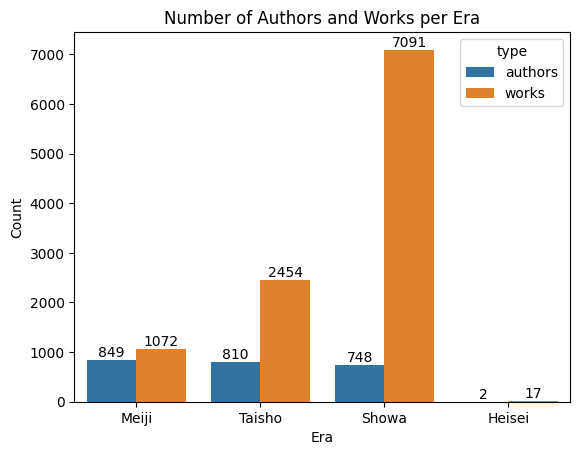

In [423]:
ax = sns.barplot(data=combined, x='bins', y='count', hue='type', errorbar=None,  estimator=np.sum)
plt.xlabel('Era')
plt.ylabel('Count')
plt.title('Number of Authors and Works per Era')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid labels for empty bars
        ax.text(
            p.get_x() + p.get_width() / 2.,  # X position (center of bar)
            height,                          # Y position (top of bar)
            f'{int(height)}',                # The count
            ha='center', va='bottom'
        )

plt.show()

Interesting that there are so many works in the Showa period relative to authors.

-  `Meiji` - 1.26 works / author
- `Taisho` - 3.03 works / author
- `Showa` - 9.48 works / author

#### author age

In [424]:
books['authorAge'].describe()

count    10560.000000
mean        42.386648
std         13.320445
min         12.000000
25%         32.000000
50%         41.000000
75%         51.000000
max         91.000000
Name: authorAge, dtype: float64

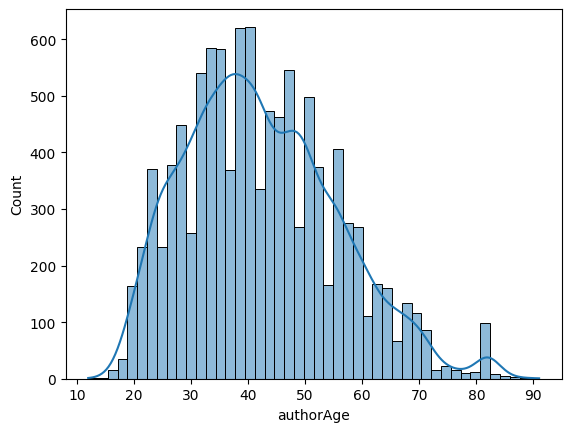

In [431]:
sns.histplot(books['authorAge'], kde=True);

In [441]:
eras = [0, 1867, 1912, 1926, 1989, 2019]
labels = ['Pre-Meiji', 'Meiji', 'Taisho', 'Showa', 'Heisei']

books['eras'] = pd.cut(books['inception'], eras, labels=labels)

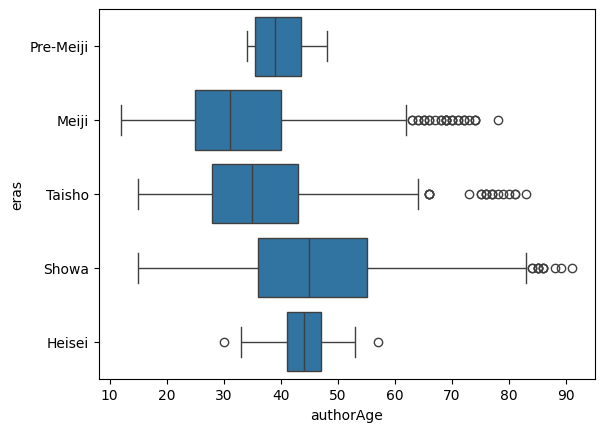

In [443]:
sns.boxplot(books, x='authorAge', y='eras');

In [451]:
authors = authors.rename(columns={'id': 'author_id'})

In [474]:
age_df = books[['author_id','authorAge']]

age_df = age_df.merge(authors[['author_id', 'first_work_age', 'birthYear', 'gender']], how='left', on='author_id')

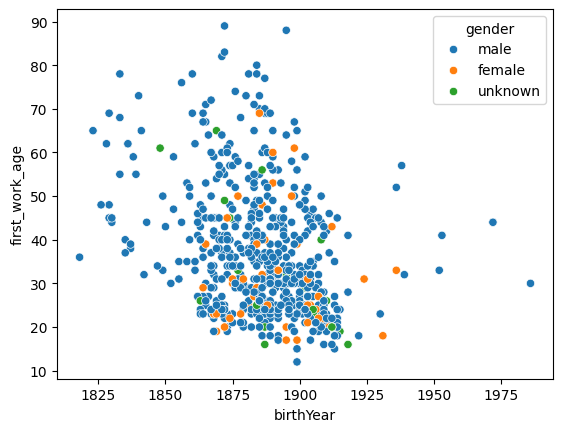

In [468]:
first_age_vs_birthYear = age_df.dropna().drop_duplicates(subset='author_id')


sns.scatterplot(first_age_vs_birthYear[first_age_vs_birthYear['birthYear'] > 1800], x='birthYear', y='first_work_age', hue='gender');

In [486]:
first_age_vs_birthYear.corr(numeric_only=True)

,author_id,authorAge,first_work_age,birthYear
author_id,1.000000,0.202318,0.286191,0.044431
authorAge,0.202318,1.000000,0.829722,-0.219422
first_work_age,0.286191,0.829722,1.000000,-0.231743
birthYear,0.044431,-0.219422,-0.231743,1.000000


In [477]:
authorAge_v_birthYear = age_df.dropna(subset=['authorAge', 'birthYear'])

authorAge_v_birthYear

,author_id,authorAge,first_work_age,birthYear,gender
3,1245,41.0,41.0,1881.0,male
7,1245,43.0,41.0,1881.0,male
8,1245,41.0,41.0,1881.0,male
9,1245,71.0,41.0,1881.0,male
10,1245,67.0,41.0,1881.0,male
...,...,...,...,...,...
17365,1395,46.0,18.0,1889.0,male
17366,1395,63.0,18.0,1889.0,male
17367,1395,32.0,18.0,1889.0,male
17368,1395,18.0,18.0,1889.0,male


In [479]:
mean_author_age = authorAge_v_birthYear.groupby('author_id')['authorAge'].mean().reset_index()

mean_author_age.columns = ['author_id', 'mean_authorAge']

birthYears = authorAge_v_birthYear.groupby('author_id')['birthYear'].first().reset_index()

authorAge_v_birthYear = mean_author_age.merge(birthYears, on ='author_id', how='left')

authorAge_v_birthYear

,author_id,mean_authorAge,birthYear
0,6,37.75,1864.0
1,8,32.50,1903.0
2,11,21.00,1914.0
3,12,21.50,1895.0
4,14,24.00,1896.0
...,...,...,...
606,2214,53.00,1865.0
607,2231,55.00,1839.0
608,2237,46.00,1911.0
609,2238,48.00,1283.0


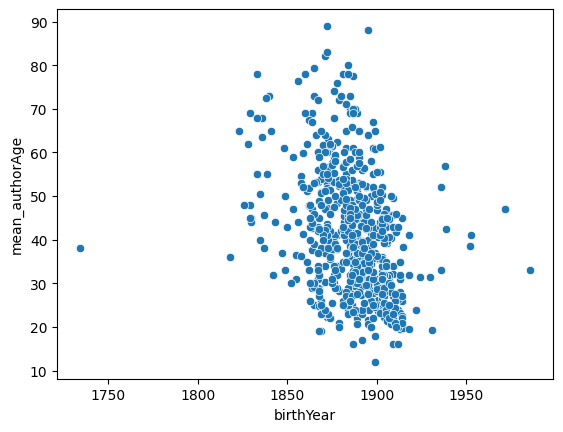

In [482]:
sns.scatterplot(authorAge_v_birthYear[authorAge_v_birthYear['birthYear']> 1700], x='birthYear', y='mean_authorAge');

In [483]:
authorAge_v_birthYear.corr()

,author_id,mean_authorAge,birthYear
author_id,1.000000,0.214639,0.045459
mean_authorAge,0.214639,1.000000,-0.230167
birthYear,0.045459,-0.230167,1.000000


Not much correlation between author age or author age at the time of writing their first work, with birthYear.

#### Contextual data

##### death causes

In [271]:
death = pd.read_excel('./data/death_causes.xlsx')

death

,year,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths
0,1899,2147.5,155.7,44.7,48.6,170.5,99.8,127.2,50.1,13.7
1,1900,2077.1,163.7,46.4,48.1,159.2,102.3,131.0,45.3,13.4
2,1901,2087.1,172.7,49.9,49.3,169.6,111.8,111.4,40.6,17.7
3,1902,2133.1,183.6,54.7,53.0,166.7,119.0,117.4,44.6,17.9
4,1903,2044.1,186.9,56.1,52.0,162.3,106.7,124.0,44.9,19.4
...,...,...,...,...,...,...,...,...,...,...
113,2012,997.5,1.7,286.6,157.9,96.5,98.4,48.2,32.6,21.0
114,2013,1009.1,1.7,290.3,156.5,94.1,97.8,55.5,31.5,20.7
115,2014,1014.9,1.7,293.5,157.0,91.1,95.4,60.1,31.1,19.5
116,2015,1029.8,1.6,295.5,156.5,89.4,96.5,67.7,30.6,18.5


In [272]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  118 non-null    int64  
 1   deaths                115 non-null    float64
 2   tuberculosis_deaths   115 non-null    float64
 3   cancer_deaths         115 non-null    float64
 4   heart_disease_deaths  115 non-null    float64
 5   brain_deaths          115 non-null    float64
 6   pneumonia_deaths      115 non-null    float64
 7   senility_deaths       115 non-null    float64
 8   accident_deaths       115 non-null    float64
 9   suicide_deaths        115 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 9.3 KB


In [273]:
death.describe()

,year,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths
count,118.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1957.500000,1265.373913,94.866087,127.035652,87.621739,140.105217,98.877391,73.005217,38.600870,19.143478
std,34.207699,639.732391,95.912000,73.360430,32.148744,28.391118,68.597682,45.882785,10.992721,3.154366
min,1899.000000,597.300000,1.500000,44.700000,48.100000,87.500000,21.900000,16.700000,23.200000,12.100000
25%,1928.250000,701.800000,3.250000,71.600000,62.900000,111.600000,38.850000,25.500000,30.900000,17.150000
50%,1957.500000,907.500000,35.500000,98.200000,71.900000,148.400000,85.000000,67.100000,40.200000,18.800000
75%,1986.750000,1972.550000,194.050000,166.300000,114.100000,165.400000,149.100000,123.200000,44.250000,21.000000
max,2016.000000,2727.800000,257.100000,298.400000,158.400000,183.300000,375.500000,149.900000,122.700000,25.700000


In [274]:
nulls(death)

,cols,null_count,% null
0,deaths,3,2.542
1,tuberculosis_deaths,3,2.542
2,pneumonia_deaths,3,2.542
3,cancer_deaths,3,2.542
4,heart_disease_deaths,3,2.542
5,brain_deaths,3,2.542
6,accident_deaths,3,2.542
7,senility_deaths,3,2.542
8,suicide_deaths,3,2.542
9,year,0,0.000


In [275]:
death[death.isnull().any(axis=1)]

,year,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths
45,1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


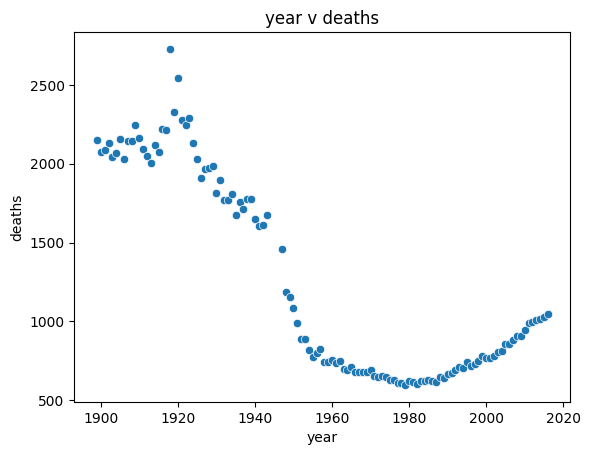

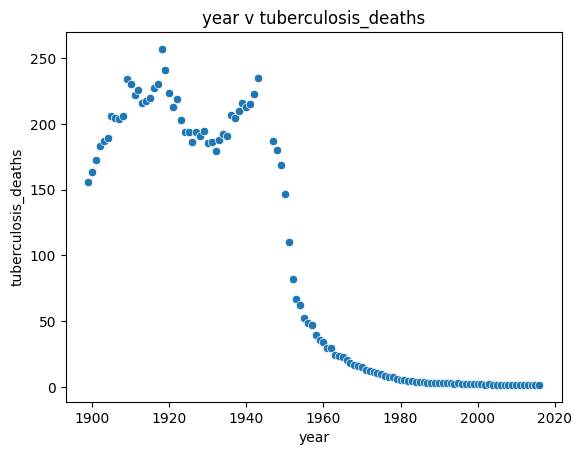

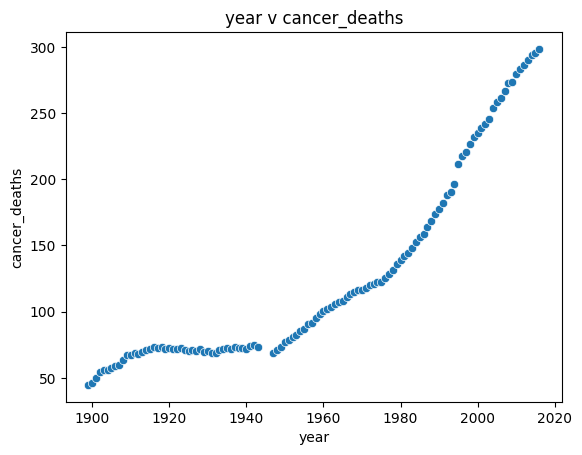

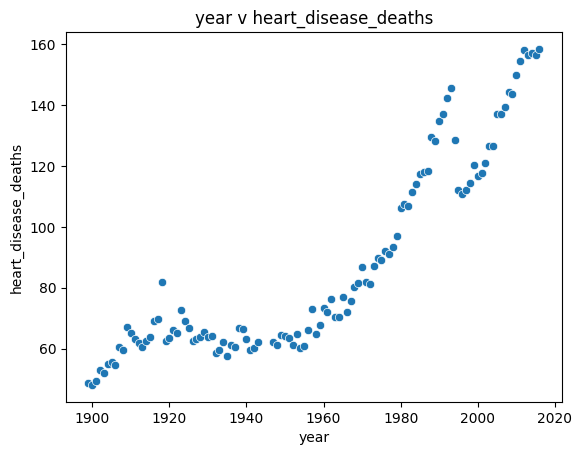

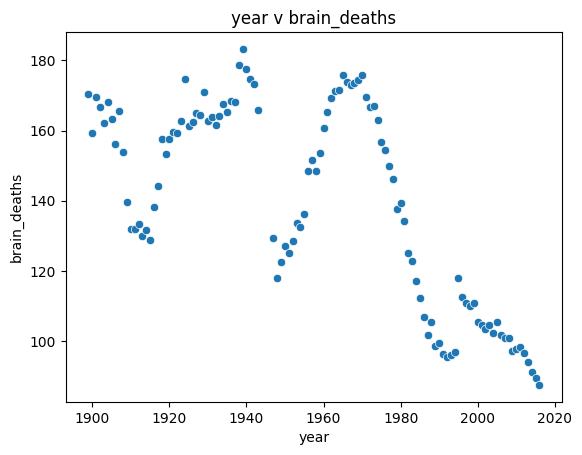

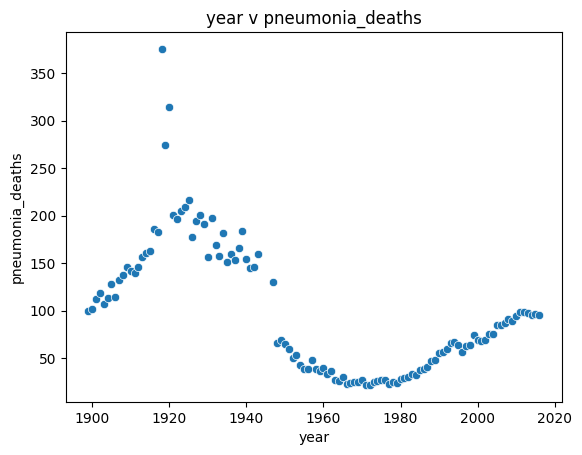

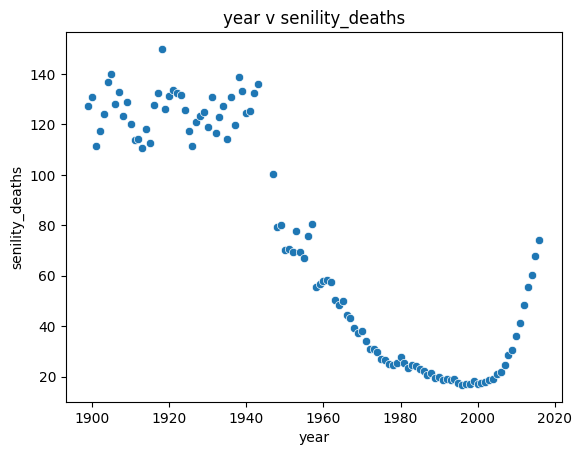

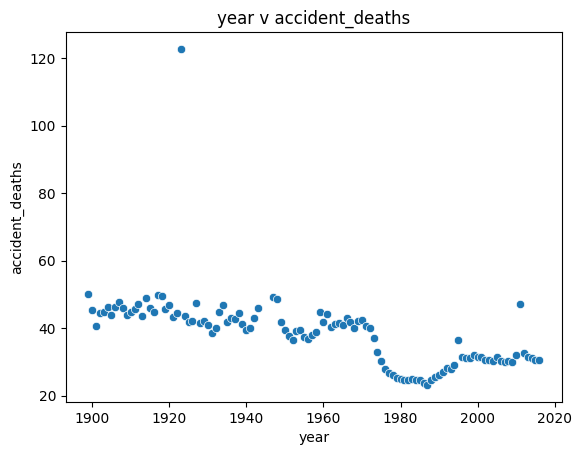

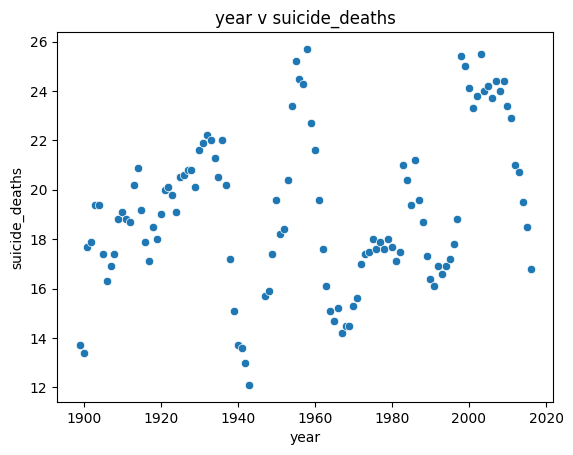

In [276]:
y = death.drop(columns='year').columns.to_list()

for column in y:
    plt.figure()
    sns.scatterplot(death, x='year', y=column)
    plt.title(f'year v {column}')
    plt.show()

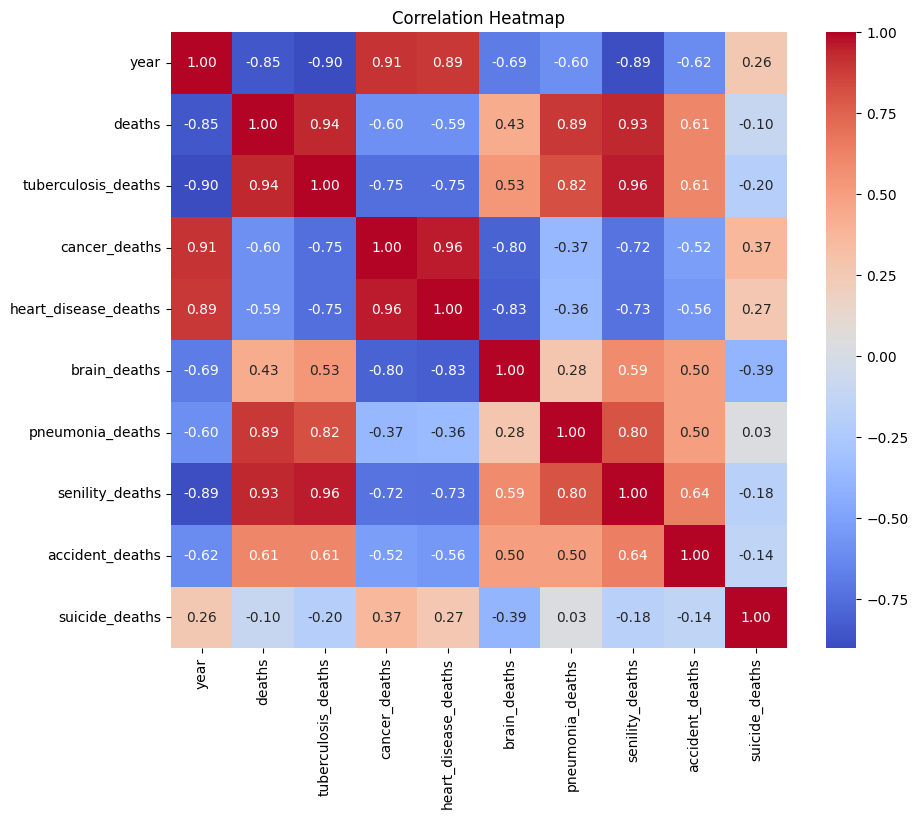

In [277]:
plt.figure(figsize=(10, 8))
sns.heatmap(death.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

A negative correlation with `deaths` would indicate that as death rate decreases, the percentage of deaths due to that specific cause increases. Likely due to other deaths being prevented by technological and health advancements, but with less results in these cases -- like cancer.

examining suicide a bit more

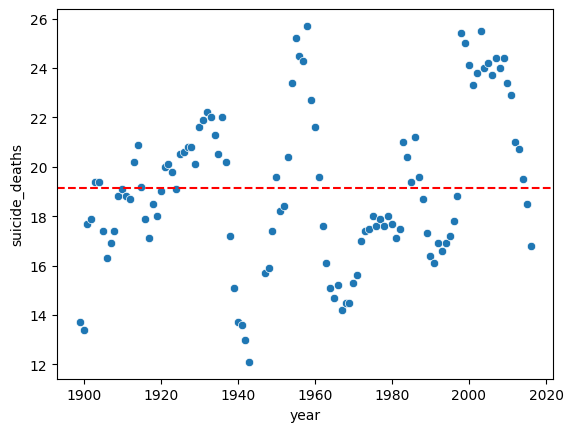

In [278]:
ax = sns.scatterplot(death, x='year', y='suicide_deaths');
ax.axhline(y=death['suicide_deaths'].mean(), color='red', ls='--');


Looks like `suicide` data shows cyclic behavior.

I'm interested if this will lead to any trends involving sentiment with years where there is a particularly large amount of suicide.

##### economy

In [279]:
econ = pd.read_csv('./data/econ.csv')
econ

,year,max,jp,percentage,WPI
0,1887,7383.00000,1848,25.02,8.85
1,1888,7179.00000,1724,24.01,9.24
2,1889,7567.00000,1755,23.19,9.66
3,1890,7106.00000,1854,26.08,10.12
4,1891,7438.00000,1750,23.52,9.40
...,...,...,...,...,...
111,1998,48956.72933,32558,66.50,21466.78
112,1999,51129.18288,32395,63.36,21152.95
113,2000,54039.96073,33211,61.46,21171.30
114,2001,56578.37709,33246,58.76,20980.44


In [280]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        116 non-null    int64  
 1   max         116 non-null    float64
 2   jp          116 non-null    int64  
 3   percentage  116 non-null    float64
 4   WPI         116 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.7 KB


In [281]:
econ.describe()

,year,max,jp,percentage,WPI
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1944.500000,27211.222195,10046.922414,34.626638,7842.257155
std,33.630343,19477.797326,10508.948057,19.625648,9239.992932
min,1887.000000,6834.249600,1724.000000,6.320000,8.850000
25%,1915.750000,9912.437541,2661.250000,23.655000,22.995000
50%,1944.500000,14778.349295,3965.000000,28.615000,85.215000
75%,1973.250000,46685.359422,17844.250000,39.742500,14949.390000
max,2002.000000,68407.000000,33246.000000,80.980000,24447.200000


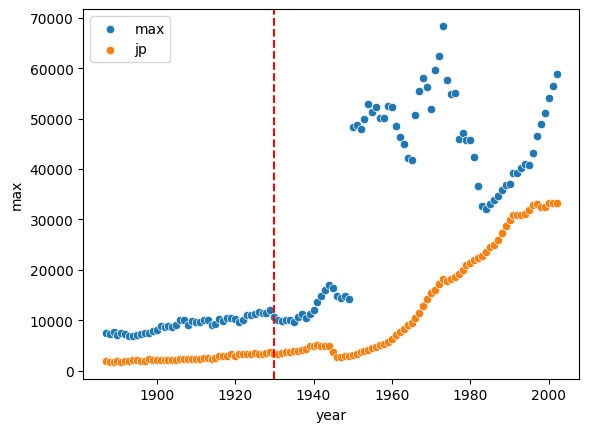

In [282]:
for gdp in ['max', 'jp']:
    sns.scatterplot(econ, x='year', y=gdp, label=gdp)

plt.legend(loc='upper left');
plt.axvline(x=1930, color='red', linestyle='--');

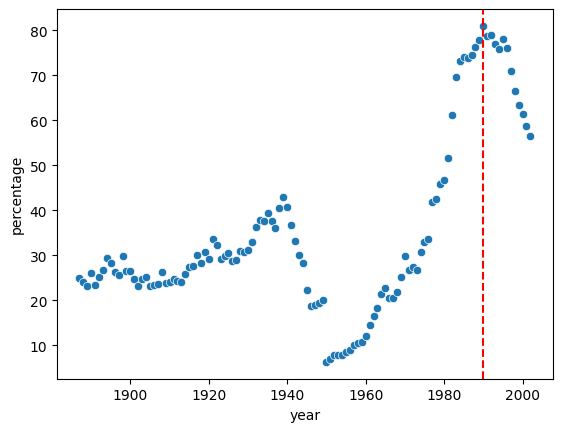

In [283]:
sns.scatterplot(econ, x='year', y='percentage');
plt.axvline(x=1990, color='red', linestyle='--');

- relative economy peaks at around 1990
- Great Depression has little effect on economy
- economy plummets at the end of WWII.

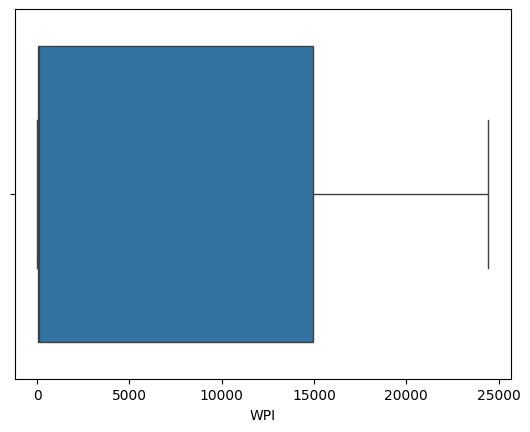

In [284]:
sns.boxplot(econ, x='WPI');

In [285]:
econ['log_WPI'] = np.log(econ['WPI'])

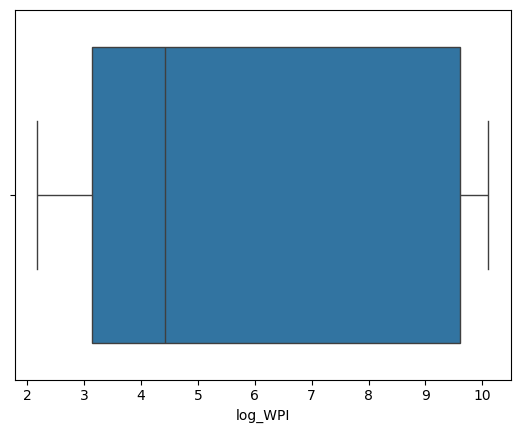

In [286]:
sns.boxplot(econ, x='log_WPI');

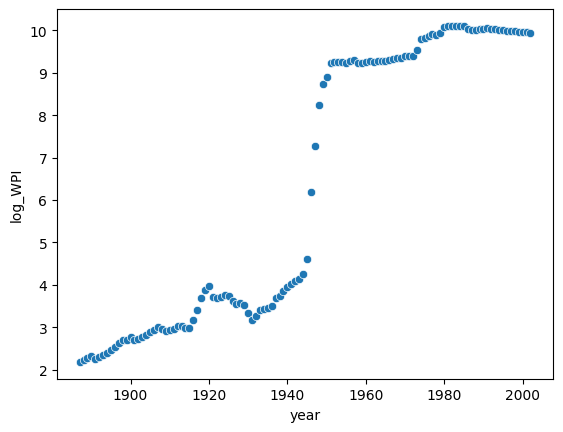

In [287]:
sns.scatterplot(econ, x='year', y='log_WPI');

Looks like an s-curve

In [288]:
econ = econ.rename(columns={'percentage': 'GDP_percentage_of_max'})

In [289]:
education = pd.read_csv('./data/education.csv')

education.head()

,year,none,primary,secondary,lower_secondary,upper_secondary,post_secondary,none_female,none_male,primary_female,primary_male,secondary_female,secondary_male,lower_secondary_female,lower_secondary_male,upper_secondary_female,upper_secondary_male,post_secondary_female,post_secondary_male
0,1900,36.217556,55.839537,7.865229,NaN,NaN,0.077678,60.673679,12.173009,32.389327,78.895100,6.900828,8.813400,NaN,NaN,NaN,NaN,0.036166,0.118491
1,1905,31.123931,57.770766,10.968236,NaN,NaN,0.137067,52.828081,9.772977,36.636685,78.560929,10.460657,11.467554,NaN,NaN,NaN,NaN,0.074577,0.198540
2,1910,26.247187,58.803364,14.712910,NaN,NaN,0.236540,45.070201,7.739627,40.042395,77.249917,14.746344,14.680036,NaN,NaN,NaN,NaN,0.141059,0.330420
3,1915,21.647524,58.786248,19.183543,NaN,NaN,0.382686,37.535247,5.940838,42.493941,74.892906,19.731445,18.641885,NaN,NaN,NaN,NaN,0.239367,0.524371
4,1920,17.452955,57.627954,24.328422,NaN,NaN,0.590669,30.432944,4.416979,43.889907,71.425257,25.300715,23.351935,NaN,NaN,NaN,NaN,0.376434,0.805829


In [290]:
### more EDA is done in `edu.ipynb`

education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    23 non-null     int64  
 1   none                    23 non-null     float64
 2   primary                 23 non-null     float64
 3   secondary               11 non-null     float64
 4   lower_secondary         12 non-null     float64
 5   upper_secondary         12 non-null     float64
 6   post_secondary          23 non-null     float64
 7   none_female             23 non-null     float64
 8   none_male               23 non-null     float64
 9   primary_female          23 non-null     float64
 10  primary_male            23 non-null     float64
 11  secondary_female        11 non-null     float64
 12  secondary_male          11 non-null     float64
 13  lower_secondary_female  12 non-null     float64
 14  lower_secondary_male    12 non-null     floa

In [291]:
nulls(education)

,cols,null_count,% null
0,secondary_male,12,52.174
1,secondary_female,12,52.174
2,secondary,12,52.174
3,upper_secondary_male,11,47.826
4,lower_secondary_female,11,47.826
5,upper_secondary,11,47.826
6,lower_secondary,11,47.826
7,lower_secondary_male,11,47.826
8,upper_secondary_female,11,47.826
9,year,0,0.000


In [292]:
education[['secondary', 'lower_secondary', 'upper_secondary']]

,secondary,lower_secondary,upper_secondary
0,7.865229,NaN,NaN
1,10.968236,NaN,NaN
2,14.712910,NaN,NaN
3,19.183543,NaN,NaN
4,24.328422,NaN,NaN
5,29.891116,NaN,NaN
6,35.673502,NaN,NaN
7,41.137216,NaN,NaN
8,46.853876,NaN,NaN
9,52.607837,NaN,NaN


Looks like secondary is just split between lower and upper.

In [293]:
sum = education['lower_secondary'] + education['upper_secondary']

education['secondary'] = education['secondary'].combine_first(sum)

In [294]:
sum = education['lower_secondary_female'] + education['upper_secondary_female']

education['secondary_female'] = education['secondary_female'].combine_first(sum)

education['secondary_male'] = education['secondary_male'].combine_first(education['lower_secondary_male'] + education['upper_secondary_male'])


In [295]:
drop = education.columns.str.contains('lower|upper')

In [296]:
education = education.loc[:, ~drop]


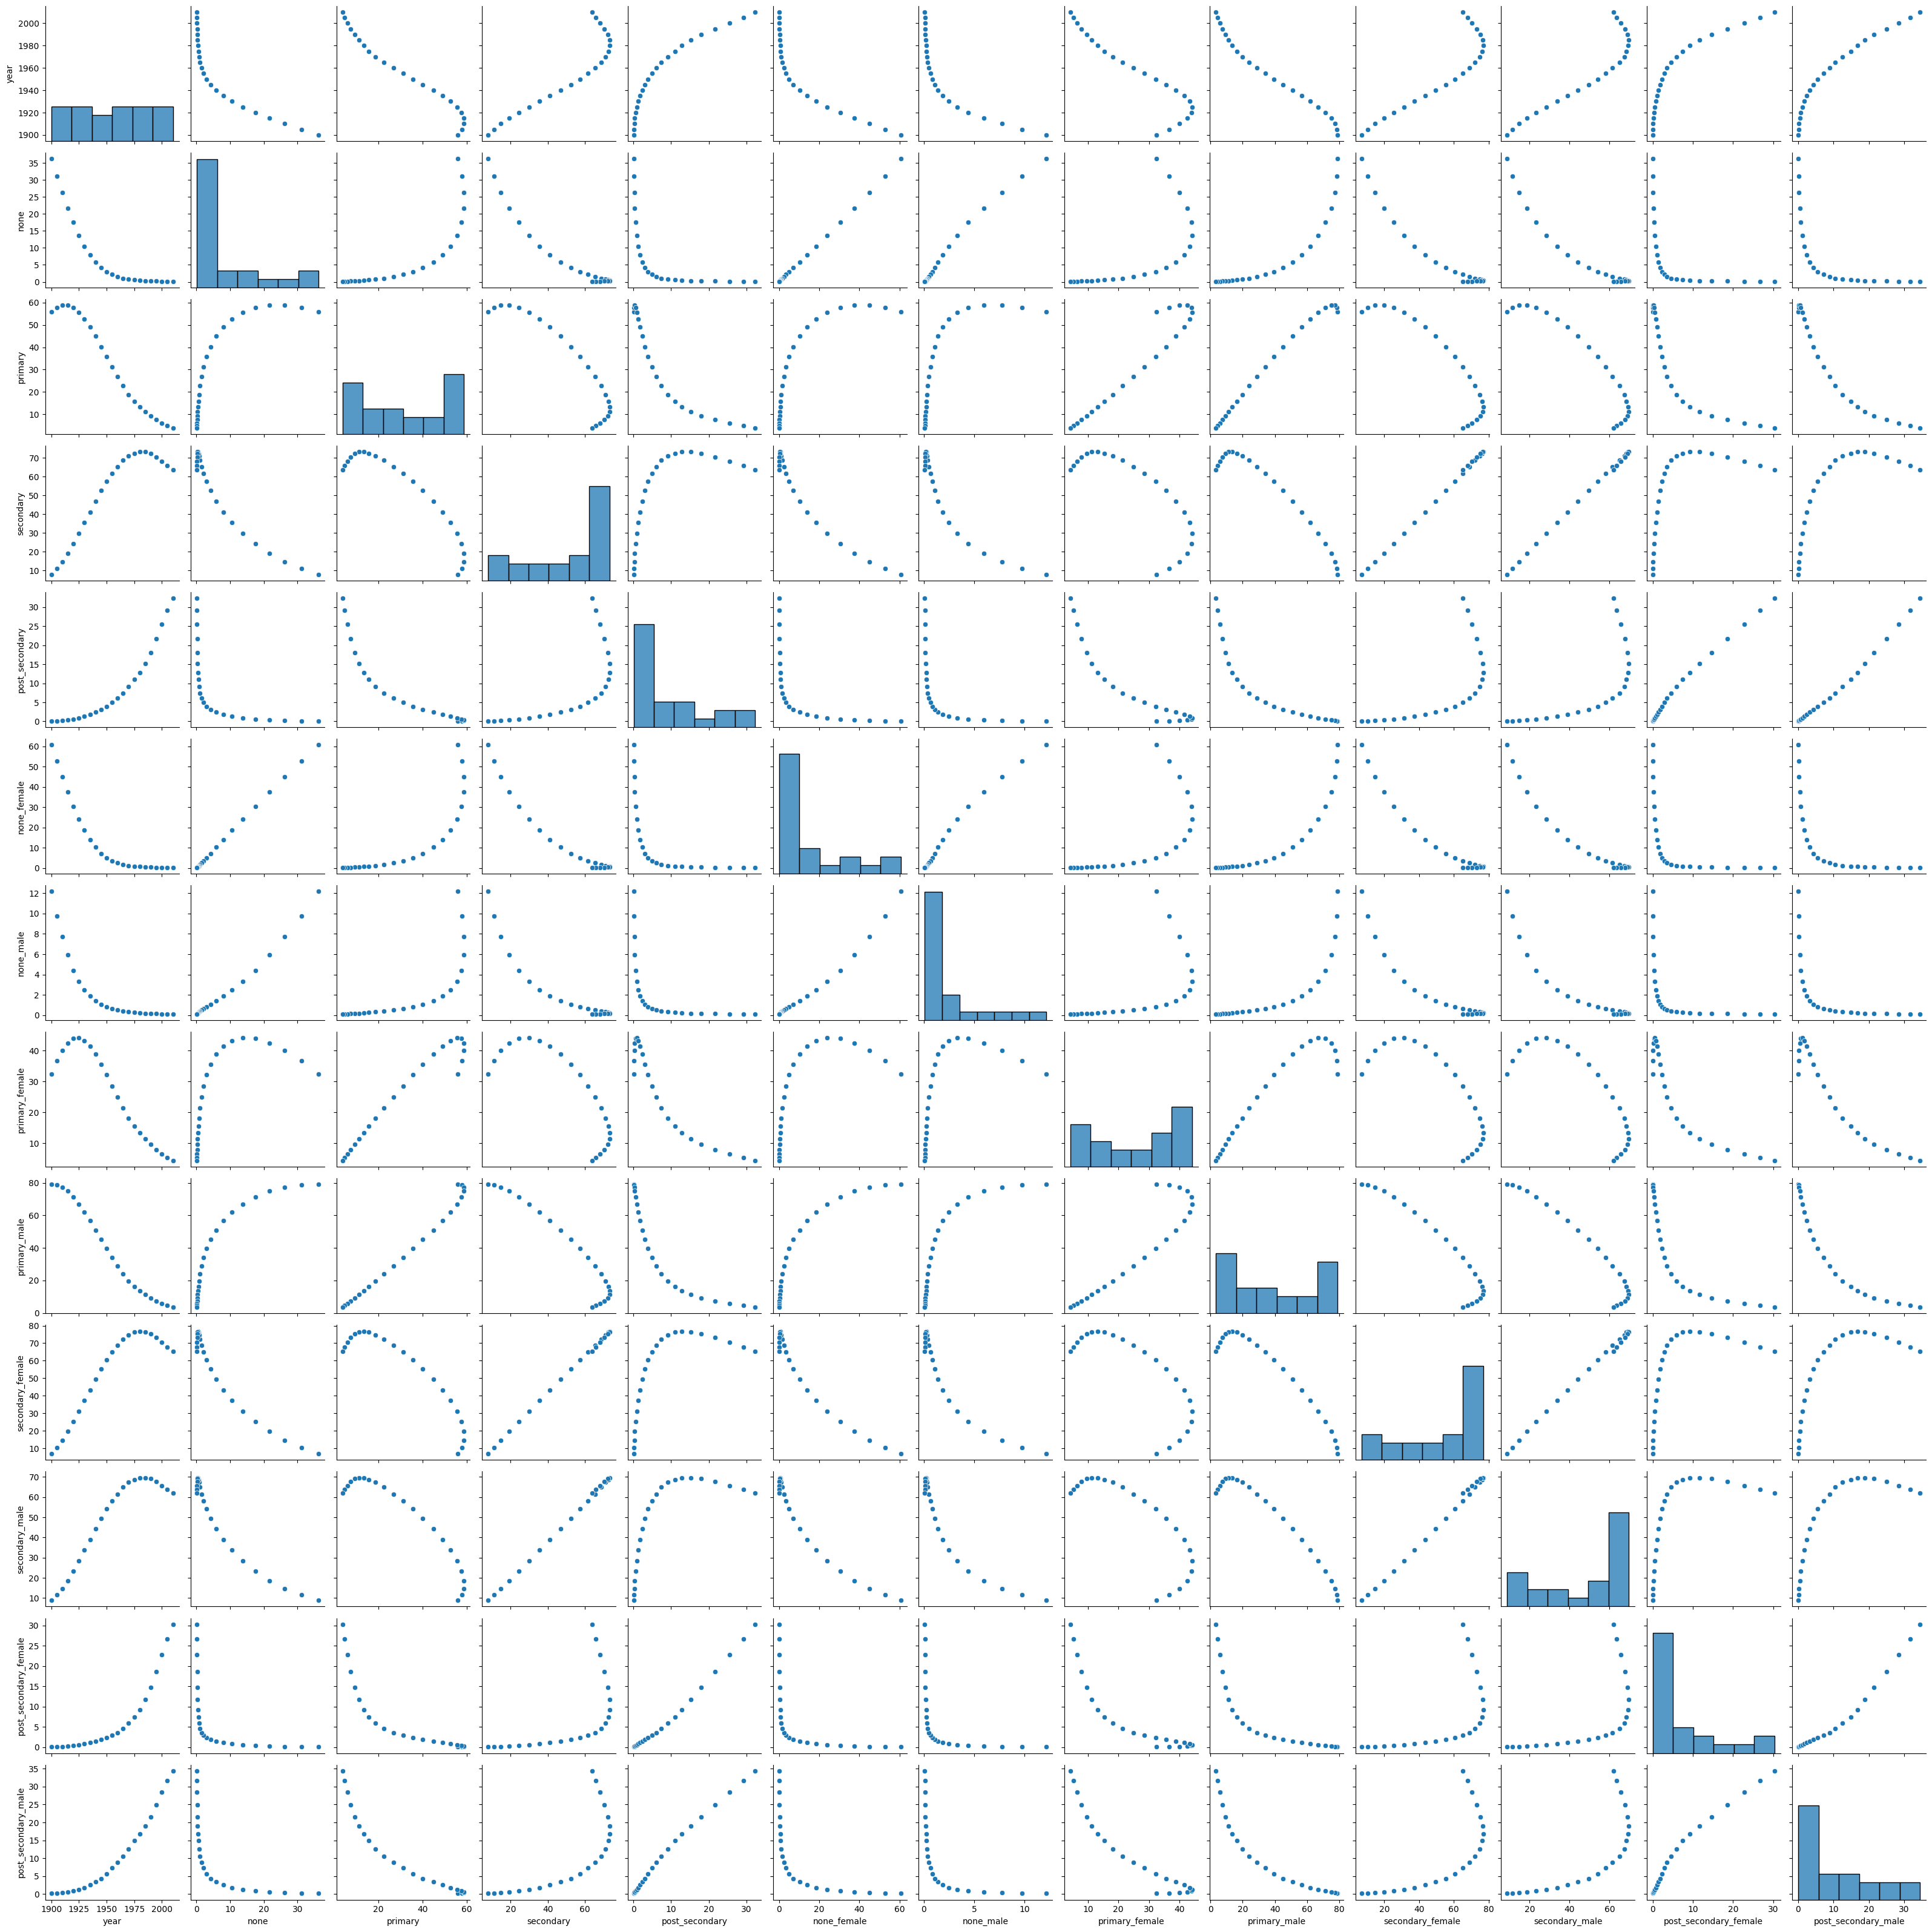

In [297]:
sns.pairplot(education);

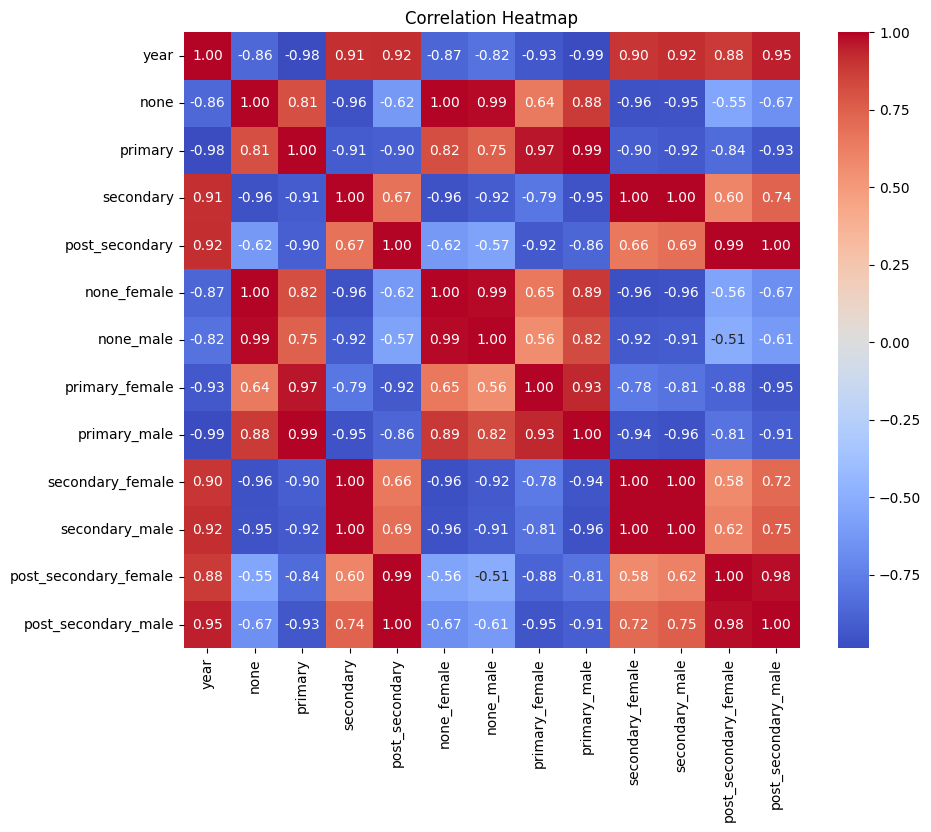

In [298]:
plt.figure(figsize=(10, 8))
sns.heatmap(education.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

- "early" levels of education (`none`, `primary`) are inversely proportionate to higher levels of education (`secondary`, `post-secondary`.)
- as the data describes the *highest* level of education attained for the population 15+ years old, as years increase, most of the lower levels of education will decrease. This is even for the case of `secondary` (middle and high school), as more of the population pursue university.

interpolation to impute missing years

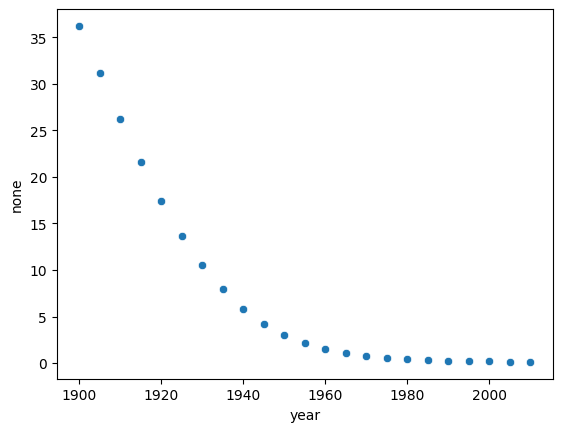

In [299]:
### only in intervalso of 5 (1900, 1905, 1910,..., 2010)

sns.scatterplot(education, x='year', y='none');

In [300]:
edu = pd.DataFrame({
    'year': np.arange(1900, 2011)
})

edu = edu.merge(education, how='left', on='year')
edu

,year,none,primary,secondary,post_secondary,none_female,none_male,primary_female,primary_male,secondary_female,secondary_male,post_secondary_female,post_secondary_male
0,1900,36.217556,55.839537,7.865229,0.077678,60.673679,12.173009,32.389327,78.895100,6.900828,8.813400,0.036166,0.118491
1,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
edu.interpolate(limit_direction="both",inplace=True)


In [302]:
edu.head(6)

,year,none,primary,secondary,post_secondary,none_female,none_male,primary_female,primary_male,secondary_female,secondary_male,post_secondary_female,post_secondary_male
0,1900,36.217556,55.839537,7.865229,0.077678,60.673679,12.173009,32.389327,78.895100,6.900828,8.813400,0.036166,0.118491
1,1901,35.198831,56.225783,8.485831,0.089555,59.104559,11.693003,33.238798,78.828266,7.612794,9.344231,0.043848,0.134500
2,1902,34.180106,56.612029,9.106432,0.101433,57.535440,11.212996,34.088270,78.761431,8.324760,9.875062,0.051530,0.150510
3,1903,33.161381,56.998275,9.727033,0.113311,55.966320,10.732990,34.937742,78.694597,9.036726,10.405893,0.059212,0.166520
4,1904,32.142656,57.384520,10.347635,0.125189,54.397201,10.252983,35.787213,78.627763,9.748692,10.936724,0.066894,0.182530
5,1905,31.123931,57.770766,10.968236,0.137067,52.828081,9.772977,36.636685,78.560929,10.460657,11.467554,0.074577,0.198540


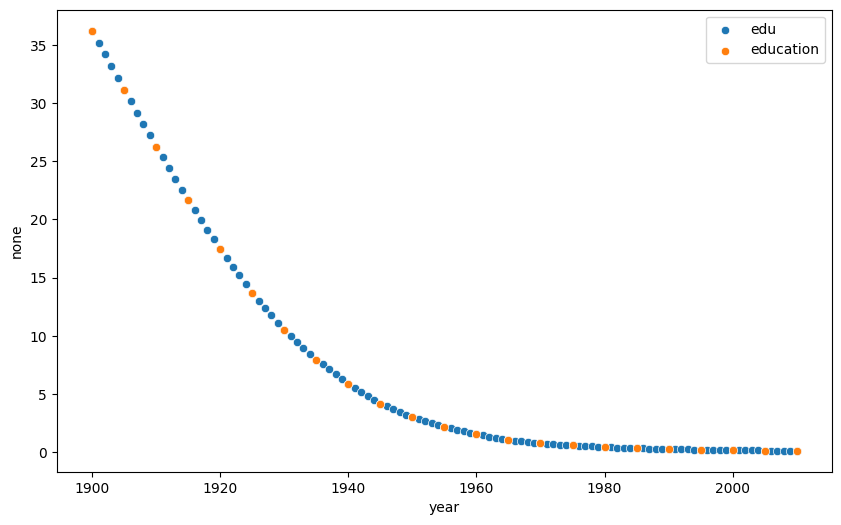

In [303]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=edu, x='year', y='none', label='edu')
sns.scatterplot(data=education, x='year', y='none', label='education')

plt.legend()
plt.show()

##### Urbanization

In [304]:
urb = pd.read_excel('./data/urbanization.xlsx')

urb

,year,percent
0,1868,10.00
1,1900,12.00
2,1910,15.00
3,1920,18.00
4,1921,19.00
...,...,...
84,2016,91.46
85,2017,91.54
86,2018,91.62
87,2019,91.70


In [305]:
urb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     89 non-null     int64  
 1   percent  89 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


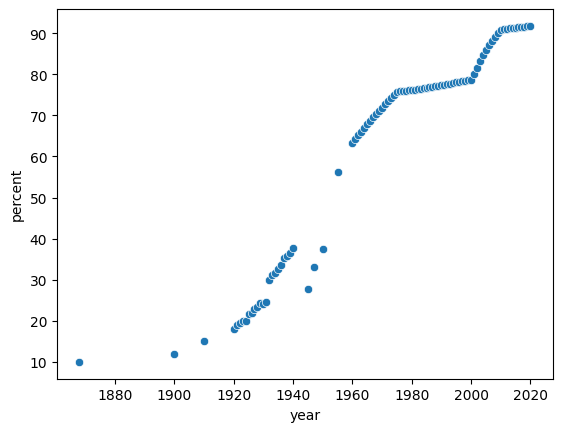

In [306]:
sns.scatterplot(urb, x='year', y='percent');

Hm. A lot of missing years.

In [307]:
urban = pd.DataFrame({
    'year': np.arange(1900, 2021, 1)
})

urban = urban.merge(urb, how='left', on='year')

urban

,year,percent
0,1900,12.00
1,1901,NaN
2,1902,NaN
3,1903,NaN
4,1904,NaN
...,...,...
116,2016,91.46
117,2017,91.54
118,2018,91.62
119,2019,91.70


In [308]:
nulls(urban)

,cols,null_count,% null
0,percent,33,27.273
1,year,0,0.000


In [309]:
urban[urban['percent'].isna()] # 1901 - 1919  values are missing. only 5 year intervals from 1940 - 1960.

,year,percent
1,1901,NaN
2,1902,NaN
3,1903,NaN
4,1904,NaN
5,1905,NaN
6,1906,NaN
7,1907,NaN
8,1908,NaN
9,1909,NaN
11,1911,NaN


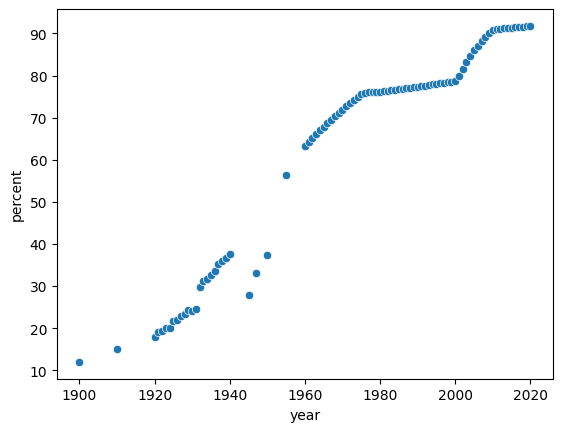

In [310]:
sns.scatterplot(urban, x='year', y = 'percent');

In [311]:
m = (urban['year'] >= 1900) & (urban['year'] <= 1920)

urban.loc[m, 'percent'] = urban.loc[m, 'percent'].interpolate(limit_direction='both')

<Axes: xlabel='year', ylabel='percent'>

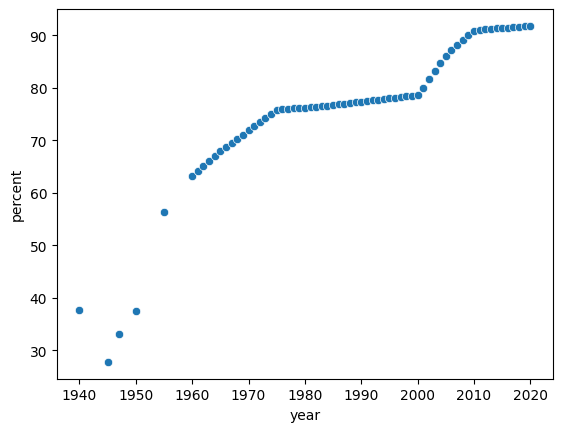

In [312]:
sns.scatterplot(urban[urban['year'] >= 1940], x='year', y='percent')

In [313]:
### Japan enters the war at 1941, and atomic bombs are dropped on 1945. 
### U.S. does not invade Japan until 1945, so I am assuming there are negligible changes to urbanization until the atomic bomb is dropped.

m = (urban['year'] >= 1940) & (urban['year'] < 1945)

urban.loc[m, 'percent'] = urban.loc[m, 'percent'].fillna(method='ffill')

C:\Users\Jaden\AppData\Local\Temp\ipykernel_17024\3838160807.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  urban.loc[m, 'percent'] = urban.loc[m, 'percent'].fillna(method='ffill')


In [314]:
m = (urban['year'] >= 1945) & (urban['year'] <= 1950)

urban.loc[m, 'percent'] = urban.loc[m, 'percent'].interpolate(limit_direction='both')

urban.loc[m]

,year,percent
45,1945,27.800000
46,1946,30.450000
47,1947,33.100000
48,1948,34.566667
49,1949,36.033333
50,1950,37.500000


In [315]:
urban = urban.interpolate(limit_direction='both')

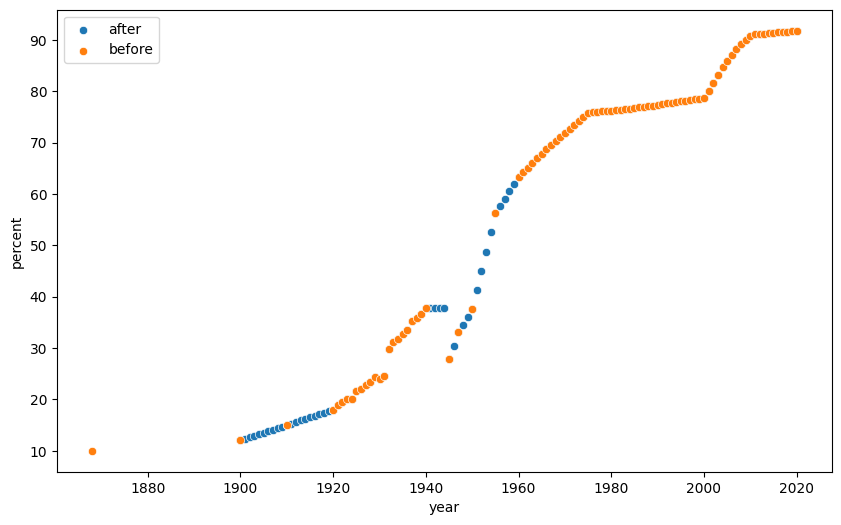

In [316]:
plt.figure(figsize=(10, 6))


sns.scatterplot(data=urban, x='year', y='percent', label='after')
sns.scatterplot(data=urb, x='year', y='percent', label='before')

plt.legend()
plt.show()

In [317]:
nulls(urban)

,cols,null_count,% null
0,year,0,0.0
1,percent,0,0.0


In [318]:
urban = urban.rename(columns={'percent': 'urban_percent'})

##### Vital

In [319]:
vital = pd.read_excel('./data/vital.xlsx')

vital.head()

,year,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
0,1899,32.0,21.5,153.8,77.9,89.1,6.9,1.53
1,1900,32.4,20.8,155.0,79.0,88.5,7.9,1.46
2,1901,33.9,20.9,149.9,77.1,93.8,8.5,1.43
3,1902,33.6,21.3,154.0,77.2,94.5,8.8,1.43
4,1903,32.7,20.4,152.4,75.8,93.6,8.1,1.44


In [320]:
nulls(vital)

,cols,null_count,% null
0,live_birth,3,2.4
1,death,3,2.4
2,infant_mortality,3,2.4
3,neonatal_mortality,3,2.4
4,marriage,3,2.4
5,foetal_death,3,2.4
6,divorce,3,2.4
7,year,0,0.0


In [321]:
vital[vital.isnull().any(axis=1)]

,year,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
45,1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
vital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                125 non-null    int64  
 1   live_birth          122 non-null    float64
 2   death               122 non-null    float64
 3   infant_mortality    122 non-null    float64
 4   neonatal_mortality  122 non-null    float64
 5   foetal_death        122 non-null    float64
 6   marriage            122 non-null    float64
 7   divorce             122 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 7.9 KB


In [323]:
vital.describe()

,year,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
count,125.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,1961.000000,20.824590,12.600820,61.501639,27.863115,57.034426,7.641803,1.229180
std,36.228442,10.534323,6.214931,65.237253,28.510596,25.171697,1.754326,0.441295
min,1899.000000,6.000000,6.000000,1.700000,0.800000,19.300000,3.900000,0.630000
25%,1930.000000,9.825000,7.100000,4.325000,2.325000,37.175000,6.125000,0.845000
50%,1961.000000,18.600000,9.950000,24.800000,14.550000,51.700000,7.900000,1.150000
75%,1992.000000,32.375000,19.075000,136.000000,53.575000,78.125000,9.000000,1.507500
max,2023.000000,36.200000,27.300000,188.600000,81.300000,101.700000,12.000000,2.300000


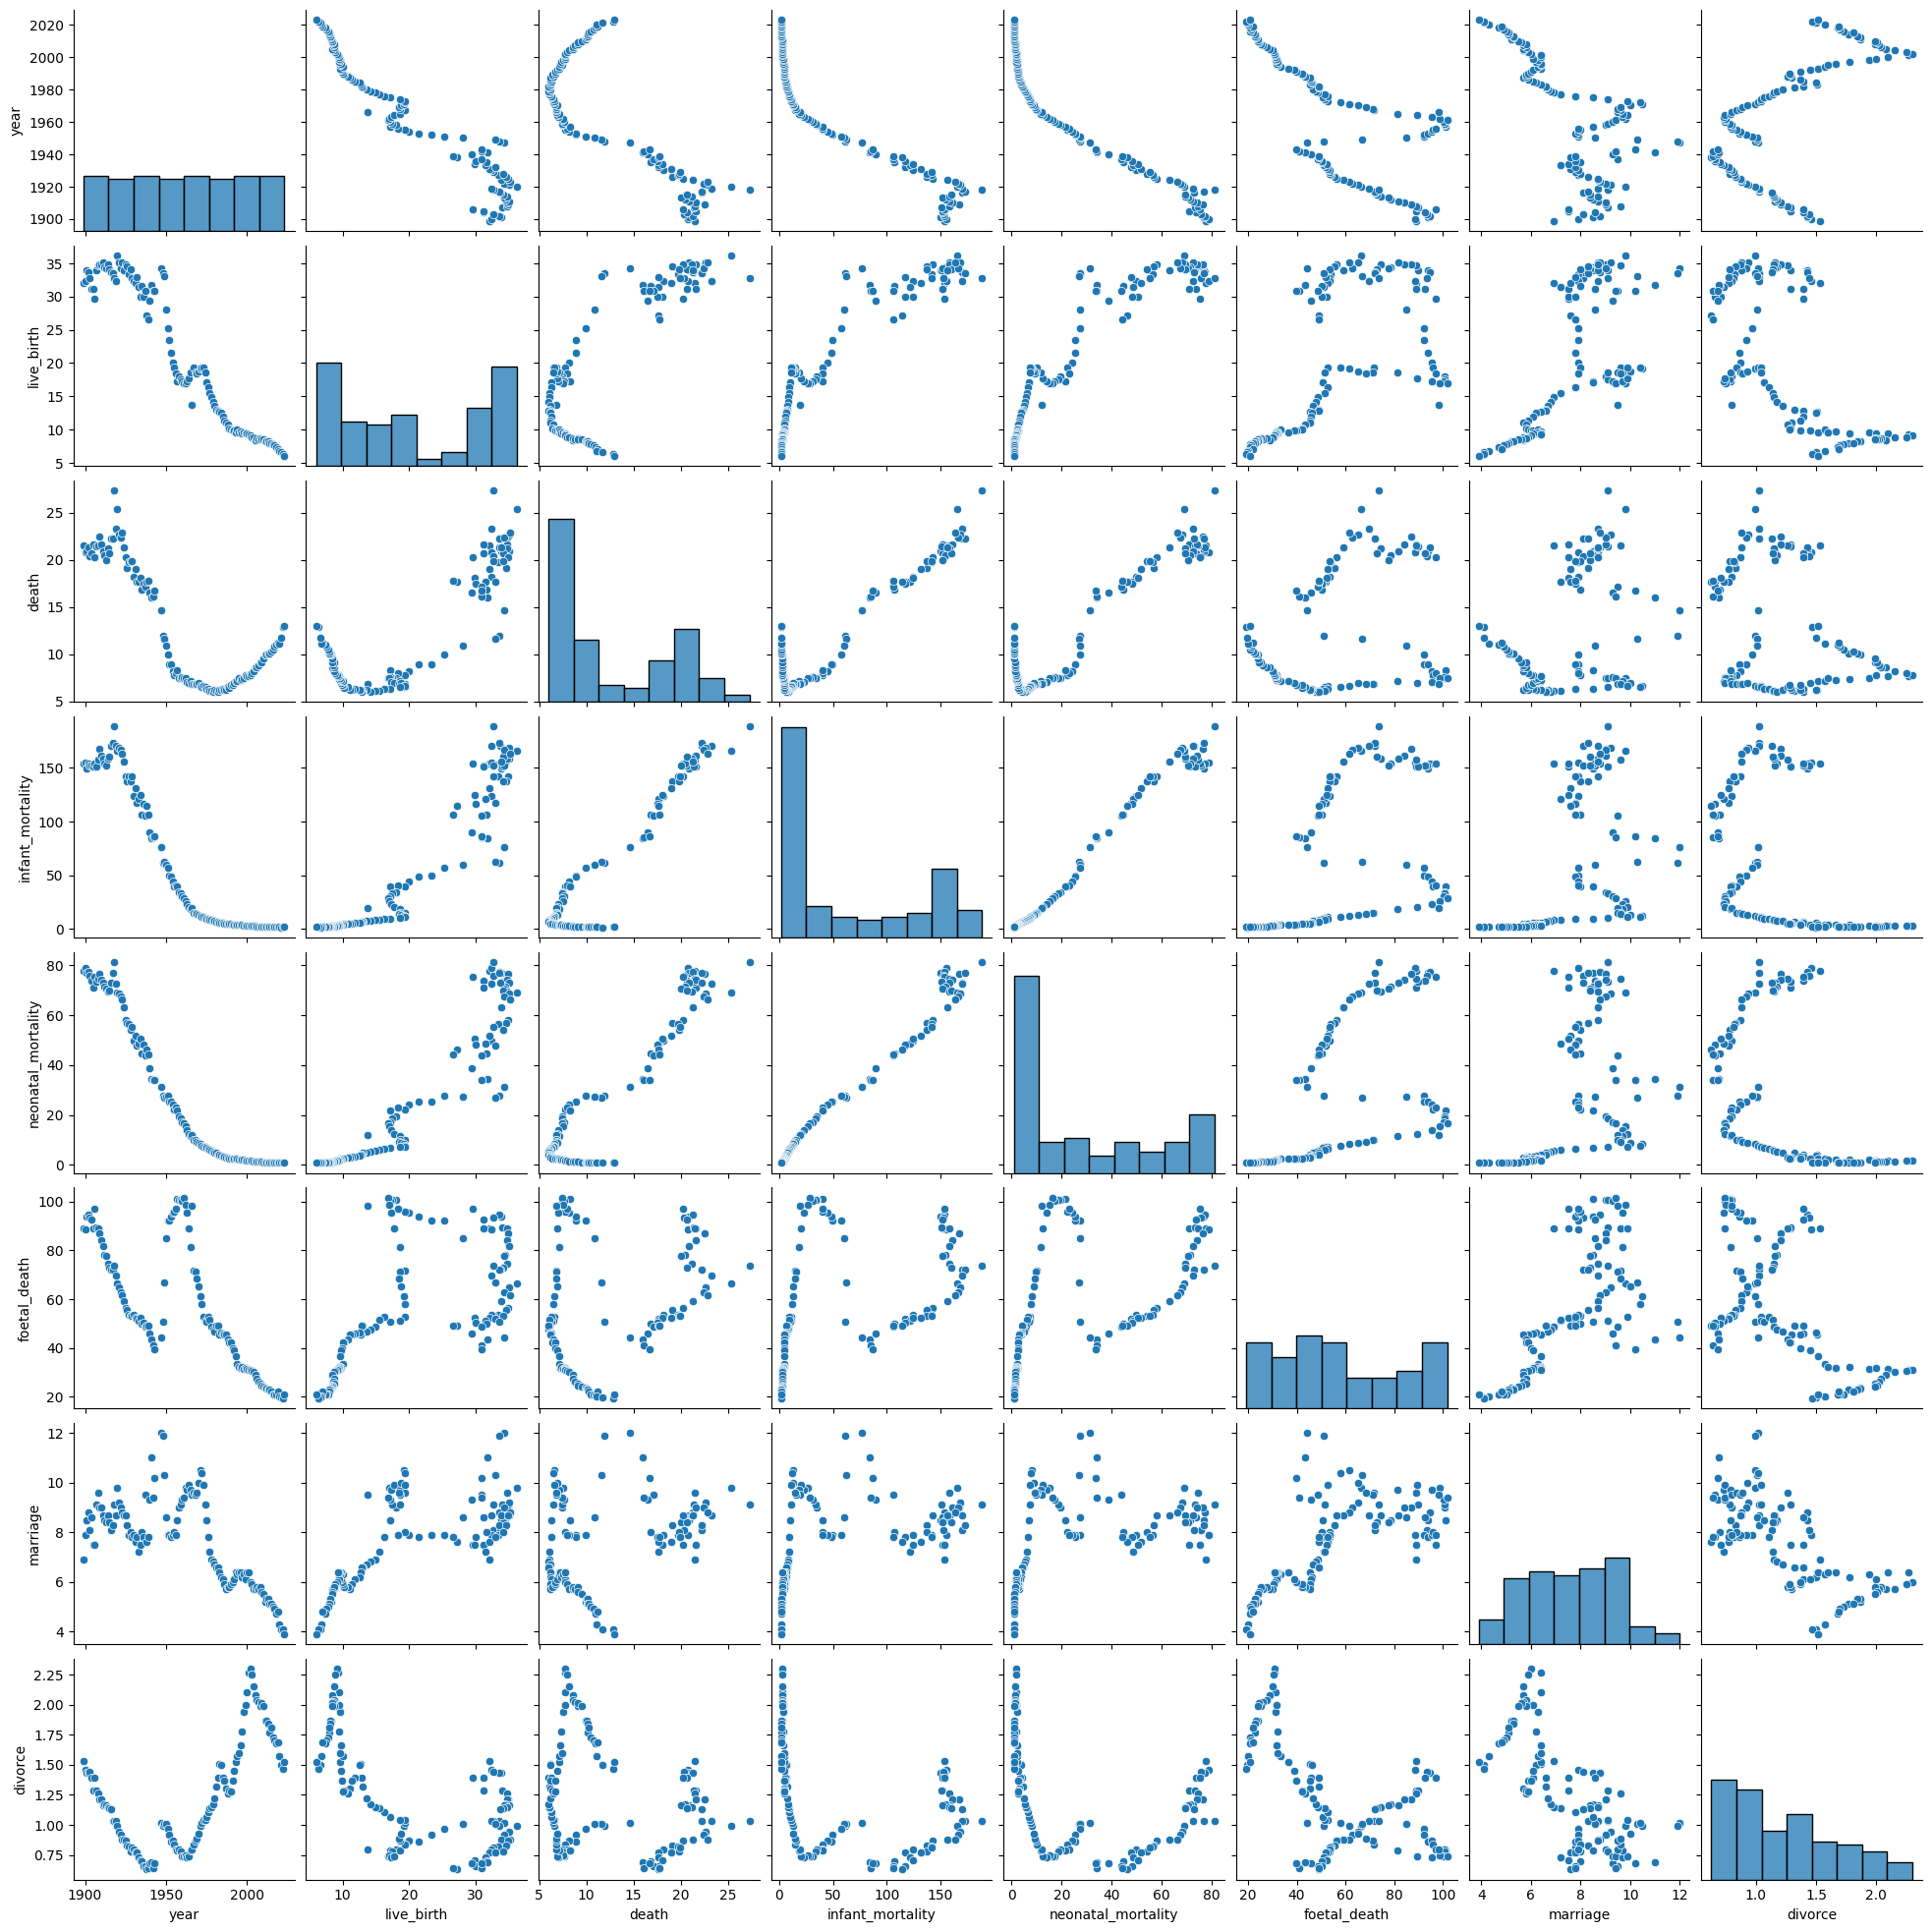

In [324]:
sns.pairplot(vital);

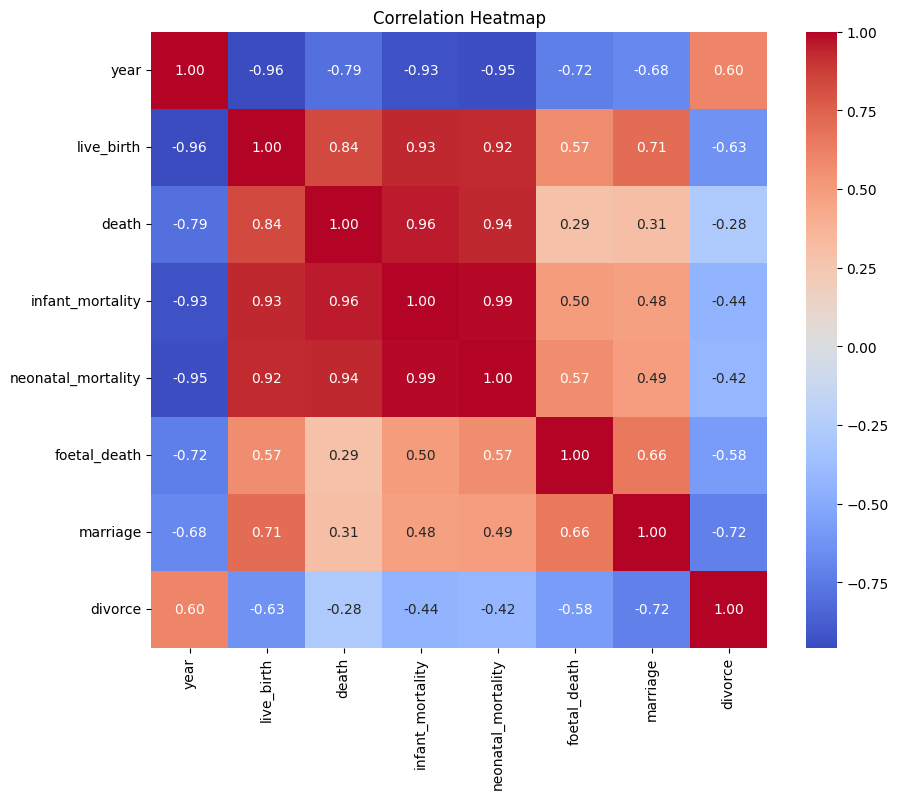

In [325]:
plt.figure(figsize=(10, 8))
sns.heatmap(vital.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

##### Combining into one df

In [326]:
df = pd.DataFrame({
    'year': np.arange(1800, 2025, 1)
})

df = df.merge(death, on='year', how='left').merge(econ, on='year', how='left').merge(edu, on='year', how='left').merge(urban, on='year', how='left').merge(vital, on='year',how='left')

df.head()


,year,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
0,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   225 non-null    int64  
 1   deaths                 115 non-null    float64
 2   tuberculosis_deaths    115 non-null    float64
 3   cancer_deaths          115 non-null    float64
 4   heart_disease_deaths   115 non-null    float64
 5   brain_deaths           115 non-null    float64
 6   pneumonia_deaths       115 non-null    float64
 7   senility_deaths        115 non-null    float64
 8   accident_deaths        115 non-null    float64
 9   suicide_deaths         115 non-null    float64
 10  max                    116 non-null    float64
 11  jp                     116 non-null    float64
 12  GDP_percentage_of_max  116 non-null    float64
 13  WPI                    116 non-null    float64
 14  log_WPI                116 non-null    float64
 15  none  

In [328]:
nulls(df)

,cols,null_count,% null
0,secondary,114,50.667
1,primary,114,50.667
2,none,114,50.667
3,post_secondary_male,114,50.667
4,post_secondary_female,114,50.667
5,secondary_male,114,50.667
6,post_secondary,114,50.667
7,primary_male,114,50.667
8,primary_female,114,50.667
9,none_male,114,50.667


In [329]:
df = df.set_index('year')
df

,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths,max,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,,,,,,,,,,,,,,,,
1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,91.78,6.8,11.1,1.8,0.8,20.1,4.3,1.57
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.6,11.7,1.7,0.8,19.7,4.1,1.50
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.3,12.9,1.8,0.8,19.3,4.1,1.47


In [330]:
df = df.dropna(how='all')

df

,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths,max,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,,,,,,,,,,,,,,,,
1887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7383.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7567.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7438.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,91.70,7.0,11.2,1.9,0.9,22.0,4.8,1.69
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,91.78,6.8,11.1,1.8,0.8,20.1,4.3,1.57
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.6,11.7,1.7,0.8,19.7,4.1,1.50


In [331]:
nulls(df)

,cols,null_count,% null
0,primary,26,18.978
1,none,26,18.978
2,post_secondary_male,26,18.978
3,post_secondary_female,26,18.978
4,secondary,26,18.978
5,post_secondary,26,18.978
6,primary_male,26,18.978
7,primary_female,26,18.978
8,none_male,26,18.978
9,none_female,26,18.978


In [332]:
df = df[df.index < 2011]

df

,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths,max,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,,,,,,,,,,,,,,,,
1887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7383.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7567.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7438.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,859.6,1.8,261.0,137.2,101.7,85.0,22.0,30.3,23.7,NaN,...,27.424803,32.243941,87.12,8.7,8.6,2.6,1.3,27.5,5.8,2.04
2007,879.0,1.7,266.9,139.2,100.8,87.4,24.4,30.1,24.4,NaN,...,28.138923,32.789337,88.15,8.6,8.8,2.6,1.3,26.2,5.7,2.02
2008,907.1,1.8,272.3,144.4,100.9,91.6,28.6,30.3,24.0,NaN,...,28.853043,33.334733,89.10,8.7,9.1,2.6,1.2,25.2,5.8,1.99


In [333]:
df[df.index < 1900].isnull().sum()

deaths                   12
tuberculosis_deaths      12
cancer_deaths            12
heart_disease_deaths     12
brain_deaths             12
pneumonia_deaths         12
senility_deaths          12
accident_deaths          12
suicide_deaths           12
max                       0
jp                        0
GDP_percentage_of_max     0
WPI                       0
log_WPI                   0
none                     13
primary                  13
secondary                13
post_secondary           13
none_female              13
none_male                13
primary_female           13
primary_male             13
secondary_female         13
secondary_male           13
post_secondary_female    13
post_secondary_male      13
urban_percent            13
live_birth               12
death                    12
infant_mortality         12
neonatal_mortality       12
foetal_death             12
marriage                 12
divorce                  12
dtype: int64

In [334]:
df = df[df.index >= 1900]

df

,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths,max,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,,,,,,,,,,,,,,,,
1900,2077.1,163.7,46.4,48.1,159.2,102.3,131.0,45.3,13.4,8037.5712,...,0.036166,0.118491,12.00,32.4,20.8,155.0,79.0,88.5,7.9,1.46
1901,2087.1,172.7,49.9,49.3,169.6,111.8,111.4,40.6,17.7,8770.3632,...,0.043848,0.134500,12.30,33.9,20.9,149.9,77.1,93.8,8.5,1.43
1902,2133.1,183.6,54.7,53.0,166.7,119.0,117.4,44.6,17.9,8684.2280,...,0.051530,0.150510,12.60,33.6,21.3,154.0,77.2,94.5,8.8,1.43
1903,2044.1,186.9,56.1,52.0,162.3,106.7,124.0,44.9,19.4,8941.3480,...,0.059212,0.166520,12.90,32.7,20.4,152.4,75.8,93.6,8.1,1.44
1904,2070.9,189.1,56.3,55.1,168.2,113.0,136.8,46.2,19.4,8663.6584,...,0.066894,0.182530,13.20,31.2,20.7,151.9,73.9,92.6,8.6,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,859.6,1.8,261.0,137.2,101.7,85.0,22.0,30.3,23.7,NaN,...,27.424803,32.243941,87.12,8.7,8.6,2.6,1.3,27.5,5.8,2.04
2007,879.0,1.7,266.9,139.2,100.8,87.4,24.4,30.1,24.4,NaN,...,28.138923,32.789337,88.15,8.6,8.8,2.6,1.3,26.2,5.7,2.02
2008,907.1,1.8,272.3,144.4,100.9,91.6,28.6,30.3,24.0,NaN,...,28.853043,33.334733,89.10,8.7,9.1,2.6,1.2,25.2,5.8,1.99


In [335]:
nulls(df)

,cols,null_count,% null
0,WPI,8,7.207
1,max,8,7.207
2,log_WPI,8,7.207
3,jp,8,7.207
4,GDP_percentage_of_max,8,7.207
5,deaths,3,2.703
6,tuberculosis_deaths,3,2.703
7,cancer_deaths,3,2.703
8,brain_deaths,3,2.703
9,heart_disease_deaths,3,2.703


In [336]:
df[df['WPI'].isna()]

,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths,max,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,,,,,,,,,,,,,,,,
2003,804.6,1.9,245.4,126.5,104.7,75.3,18.6,30.7,25.5,NaN,...,25.134805,30.423785,83.20,8.9,8.0,3.0,1.7,30.5,5.9,2.25
2004,815.2,1.8,253.9,126.5,102.3,75.7,19.1,30.3,24.0,NaN,...,25.922745,31.061165,84.64,8.8,8.2,2.8,1.5,30.0,5.7,2.15
2005,858.8,1.8,258.3,137.2,105.3,85.0,20.9,31.6,24.2,NaN,...,26.710684,31.698546,85.98,8.4,8.6,2.8,1.4,29.1,5.7,2.08
2006,859.6,1.8,261.0,137.2,101.7,85.0,22.0,30.3,23.7,NaN,...,27.424803,32.243941,87.12,8.7,8.6,2.6,1.3,27.5,5.8,2.04
2007,879.0,1.7,266.9,139.2,100.8,87.4,24.4,30.1,24.4,NaN,...,28.138923,32.789337,88.15,8.6,8.8,2.6,1.3,26.2,5.7,2.02
2008,907.1,1.8,272.3,144.4,100.9,91.6,28.6,30.3,24.0,NaN,...,28.853043,33.334733,89.10,8.7,9.1,2.6,1.2,25.2,5.8,1.99
2009,907.5,1.7,273.5,143.7,97.2,89.0,30.7,30.0,24.4,NaN,...,29.567162,33.880128,89.99,8.5,9.1,2.4,1.2,24.6,5.6,2.01
2010,947.1,1.7,279.7,149.8,97.7,94.1,35.9,32.2,23.4,NaN,...,30.281282,34.425524,90.81,8.5,9.5,2.3,1.1,24.2,5.5,1.99


In [337]:
df[df['deaths'].isna()]

,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths,max,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,,,,,,,,,,,,,,,,
1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16999.32717,...,1.741511,4.131386,37.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16477.55177,...,1.821456,4.322450,27.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14822.46647,...,1.910500,4.569069,30.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- `econ` data is missing for years >= 2003
- `vital` and `death` data is missing for WWII years

In [343]:
df.loc[1942:].head(6)

,deaths,tuberculosis_deaths,cancer_deaths,heart_disease_deaths,brain_deaths,pneumonia_deaths,senility_deaths,accident_deaths,suicide_deaths,max,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,,,,,,,,,,,,,,,,
1942,1611.7,223.1,74.5,60.1,173.2,146.5,132.6,43.0,13.0,14869.86115,...,1.581622,3.749258,37.70,30.9,16.1,85.5,34.1,41.0,9.4,0.64
1943,1672.6,235.3,73.5,62.3,166.0,159.8,136.1,46.0,12.1,16050.21742,...,1.661566,3.940322,37.70,30.9,16.7,86.6,33.8,39.6,10.2,0.68
1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16999.32717,...,1.741511,4.131386,37.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16477.55177,...,1.821456,4.322450,27.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14822.46647,...,1.910500,4.569069,30.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947,1457.4,187.2,69.0,62.2,129.4,130.1,100.3,49.3,15.7,14311.54719,...,1.999545,4.815689,33.10,34.3,14.6,76.7,31.4,44.2,12.0,1.02


In [357]:
### estimating death rates

# 1944: 1,290,513 deaths, 73,064,000 population
df.loc[1944, 'deaths'] = 1290513.0 / 73064000 * 100000

# 1945: 2,115,162 deaths, 71,998,104 population

df.loc[1945, 'deaths'] = 2115162.0 / 71998104 * 100000

# 1946: No death data is known. But, it is more than 1944's deaths, and should be less than 1945's. Estimate of 1,500,000 deaths. 73,110,995 population

df.loc[1946, 'deaths'] = 1500000.0 / 73110995 * 100000

In [353]:
df = df.drop(columns='death') # redundant

In [361]:
df.loc[1935: 1948, 'suicide_deaths']

year
1935    20.5
1936    22.0
1937    20.2
1938    17.2
1939    15.1
1940    13.7
1941    13.6
1942    13.0
1943    12.1
1944     NaN
1945     NaN
1946     NaN
1947    15.7
1948    15.9
Name: suicide_deaths, dtype: float64

In [363]:
## 1. wartime increases national unity and pride, which would decrease the rate of suicide.
## 2. killing oneself during the war probably is not treated as death by suicide but as a wartime casualty
## 3. the government could easily have altered the accuracy of suicide data.

## so I'm going to make it a conservative estimate, with the same suicide rates as 1943.

df.loc[1944: 1946, 'suicide_deaths'] = 12.1

In [ ]:
deaths = [col for col in df.columns if '_deaths' in col]

df.loc[1944:1947, deaths] = df.loc[1944: 1947, deaths].bfill() # majority of deaths are due to wartime casualities, so the rest of the death rates should be lower than pre-war.

In [413]:
vital = vital.drop(columns='death')

In [414]:
v = [col for col in vital.columns if 'year' not in col]

df.loc[1935: 1950, v]

,live_birth,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,
1935,31.6,106.700,44.7,50.1,8.000000,0.700000
1936,30.0,116.700,48.1,50.2,7.800000,0.660000
1937,30.9,105.800,43.8,48.6,9.500000,0.660000
1938,27.2,114.400,46.2,49.1,7.600000,0.630000
1939,26.6,106.200,44.3,49.2,7.800000,0.640000
1940,29.4,90.000,38.7,46.0,9.300000,0.680000
1941,31.8,84.100,34.2,43.4,11.000000,0.690000
1942,30.9,85.500,34.1,41.0,9.400000,0.640000
1943,30.9,86.600,33.8,39.6,10.200000,0.680000


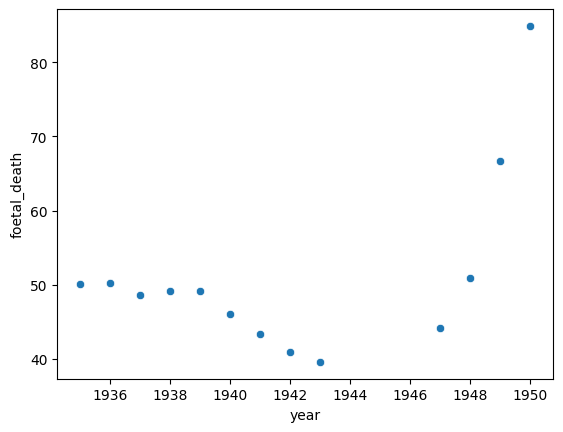

In [416]:
sns.scatterplot(df.loc[1935: 1950, v], x='year', y='foetal_death');

divorce logically should not change much until post-war... how can they divorce if soldiers are out at war?

In [397]:
df.loc[1935: 1946, 'divorce'].fillna(df.loc[1935:1946, 'divorce'].mean(), inplace=True)

C:\Users\Jaden\AppData\Local\Temp\ipykernel_17024\2286073710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[1935: 1946, 'divorce'].fillna(df.loc[1935:1946, 'divorce'].mean(), inplace=True)


same for marriage

In [401]:
df.loc[1935: 1946, 'marriage'].fillna(df.loc[1935:1946, 'marriage'].mean(), inplace=True)

C:\Users\Jaden\AppData\Local\Temp\ipykernel_17024\2375687330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[1935: 1946, 'marriage'].fillna(df.loc[1935:1946, 'marriage'].mean(), inplace=True)


In [417]:
df.loc[1935: 1950, v]

,live_birth,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,
1935,31.6,106.700,44.7,50.1,8.000000,0.700000
1936,30.0,116.700,48.1,50.2,7.800000,0.660000
1937,30.9,105.800,43.8,48.6,9.500000,0.660000
1938,27.2,114.400,46.2,49.1,7.600000,0.630000
1939,26.6,106.200,44.3,49.2,7.800000,0.640000
1940,29.4,90.000,38.7,46.0,9.300000,0.680000
1941,31.8,84.100,34.2,43.4,11.000000,0.690000
1942,30.9,85.500,34.1,41.0,9.400000,0.640000
1943,30.9,86.600,33.8,39.6,10.200000,0.680000


live birth rates should decrease during WWII due to hardships and overall stress.

In [404]:
df.loc[1944: 1946, 'live_birth'] = [26.0, 24.0, 22.0]

since infant and neonatal mortality is in number of deaths per 1000 live births, the numbers should be similar regardless of war or not.

In [409]:
df.loc[1935: 1950, 'infant_mortality'] = df.loc[1935: 1950, 'infant_mortality'].interpolate(limit_direction='both')

In [408]:
df.loc[1935: 1950, 'neonatal_mortality'] = df.loc[1935: 1950, 'neonatal_mortality'].interpolate(limit_direction='both')

not exactly sure why foetal death increases after WWII, perhaps due to stress or the effects of the nuclear bombs?

In [418]:
df.loc[1935: 1950,  'foetal_death']

year
1935    50.1
1936    50.2
1937    48.6
1938    49.1
1939    49.2
1940    46.0
1941    43.4
1942    41.0
1943    39.6
1944     NaN
1945     NaN
1946     NaN
1947    44.2
1948    50.9
1949    66.7
1950    84.9
Name: foetal_death, dtype: float64

In [421]:
df.loc[1935: 1950, 'foetal_death'] = df.loc[1935: 1950, 'foetal_death'].fillna(np.round(df.loc[1935: 1948, 'foetal_death'].mean(), 1))

In [422]:
df.loc[1935: 1950, v]

,live_birth,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
year,,,,,,
1935,31.6,106.700,44.7,50.1,8.000000,0.700000
1936,30.0,116.700,48.1,50.2,7.800000,0.660000
1937,30.9,105.800,43.8,48.6,9.500000,0.660000
1938,27.2,114.400,46.2,49.1,7.600000,0.630000
1939,26.6,106.200,44.3,49.2,7.800000,0.640000
1940,29.4,90.000,38.7,46.0,9.300000,0.680000
1941,31.8,84.100,34.2,43.4,11.000000,0.690000
1942,30.9,85.500,34.1,41.0,9.400000,0.640000
1943,30.9,86.600,33.8,39.6,10.200000,0.680000


In [411]:
nulls(df)

,cols,null_count,% null
0,WPI,8,7.207
1,max,8,7.207
2,GDP_percentage_of_max,8,7.207
3,jp,8,7.207
4,log_WPI,8,7.207
5,foetal_death,3,2.703
6,deaths,0,0.000
7,heart_disease_deaths,0,0.000
8,tuberculosis_deaths,0,0.000
9,suicide_deaths,0,0.000


#### 1231

In [268]:
books = books.dropna(subset='inception')

books.info()

KeyError: ['inception']

In [ ]:
authors = authors.rename(columns={'id': 'author_id'})

In [ ]:
books = books.merge(authors, how='left', on='author_id')

In [ ]:
books = books.drop(columns=['text', 'char_count', 'url', 'author', 'birthDate', 'deathDate', 'last', 'first', 'birthPlace', 'birthYear', 'deathYear', 'category', 'title', 'author_id', 'id'])

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10639 entries, 0 to 10638
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   inception       10639 non-null  float64 
 1   char_type       10639 non-null  object  
 2   authorAge       10564 non-null  float64 
 3   author_role     10639 non-null  object  
 4   length_type     10639 non-null  category
 5   gender          10636 non-null  object  
 6   first_work_age  10564 non-null  float64 
dtypes: category(1), float64(3), object(3)
memory usage: 509.4+ KB


In [ ]:
books['char_type'].unique()

array(['旧字旧仮名', '新字旧仮名', '新字新仮名', 'その他', '旧字新仮名'], dtype=object)

In [ ]:
books = pd.get_dummies(books, columns=['char_type', 'gender', 'length_type', 'author_role'])

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10639 entries, 0 to 10638
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inception               10639 non-null  float64
 1   authorAge               10564 non-null  float64
 2   first_work_age          10564 non-null  float64
 3   char_type_その他           10639 non-null  bool   
 4   char_type_新字新仮名         10639 non-null  bool   
 5   char_type_新字旧仮名         10639 non-null  bool   
 6   char_type_旧字新仮名         10639 non-null  bool   
 7   char_type_旧字旧仮名         10639 non-null  bool   
 8   gender_female           10639 non-null  bool   
 9   gender_male             10639 non-null  bool   
 10  gender_unknown          10639 non-null  bool   
 11  length_type_flash       10639 non-null  bool   
 12  length_type_shortshort  10639 non-null  bool   
 13  length_type_short       10639 non-null  bool   
 14  length_type_novelette   10639 non-null

In [ ]:
books = books.rename(columns={'inception': 'year'})
df = df.reset_index()

In [ ]:
df = books.merge(df, how='left', on='year')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10639 entries, 0 to 10638
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    10639 non-null  float64
 1   authorAge               10564 non-null  float64
 2   first_work_age          10564 non-null  float64
 3   char_type_その他           10639 non-null  bool   
 4   char_type_新字新仮名         10639 non-null  bool   
 5   char_type_新字旧仮名         10639 non-null  bool   
 6   char_type_旧字新仮名         10639 non-null  bool   
 7   char_type_旧字旧仮名         10639 non-null  bool   
 8   gender_female           10639 non-null  bool   
 9   gender_male             10639 non-null  bool   
 10  gender_unknown          10639 non-null  bool   
 11  length_type_flash       10639 non-null  bool   
 12  length_type_shortshort  10639 non-null  bool   
 13  length_type_short       10639 non-null  bool   
 14  length_type_novelette   10639 non-null

In [ ]:
df.shape

(10639, 54)

In [ ]:
np.unique_counts(df[df['divorce'].isna()]['year'])

UniqueCountsResult(values=array([ 712., 1331., 1768., 1776., 1854., 1872., 1873., 1874., 1875.,
       1876., 1877., 1878., 1879., 1881., 1882., 1883., 1884., 1886.,
       1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895.,
       1896., 1897., 1898., 1899., 1944., 1945., 1946., 2016., 2019.,
       2022.]), counts=array([  1,   1,   1,   1,   1,   2,   1,   6,   5,   3,   5,   1,   2,
         1,   7,   1,   1,   5,   5,   5,   4,  13,  13,  37,  44,  17,
        28,  31,  30,  29,  29,  58,  40, 254,   3,   3,   3]))

### Clusters

In [285]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

#### K-Means

K-Means works with the underlying assumptions of:
- spherical clusters
- equal variance
- similar cluster sizes

This, with curse of dimensionality, makes me to believe that K-Means clustering will not be very effective.

... Let's see

In [321]:
df = df.drop(columns=['year'])
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [322]:
df_scaled

,authorAge,first_work_age,char_type_その他,char_type_新字新仮名,char_type_新字旧仮名,char_type_旧字新仮名,char_type_旧字旧仮名,gender_female,gender_male,gender_unknown,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
0,-0.104052,1.462128,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,-0.641045,-0.757078,-0.900445,0.716071,1.093811,1.224189,1.087353,0.057655,0.300743,0.281625
1,0.046123,1.462128,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,-0.584025,-0.694774,-0.850111,0.629780,0.850809,0.977926,0.835867,-0.164239,0.041796,0.065910
2,-0.104052,1.462128,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,-0.641045,-0.757078,-0.900445,0.716071,1.093811,1.224189,1.087353,0.057655,0.300743,0.281625
3,2.148572,1.462128,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,0.966493,1.279018,1.248833,-1.635374,-1.888480,-1.600591,-1.374869,1.820817,-0.648730,0.281625
4,1.848222,1.462128,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,0.642296,0.823362,0.371897,0.543488,-1.225749,-1.303627,-1.252051,-0.662003,2.803898,0.659128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10634,0.271385,-0.982890,-0.023755,0.765672,-0.574058,-0.036299,-0.368998,-0.436399,0.464037,-0.131187,...,-0.145302,-0.165412,0.215301,0.133603,-0.143288,-0.217173,-0.246107,-0.709980,-0.562414,-0.904812
10635,1.547872,-0.982890,-0.023755,0.765672,-0.574058,-0.036299,-0.368998,-0.436399,0.464037,-0.131187,...,0.966493,1.279018,1.248833,-1.635374,-1.888480,-1.600591,-1.374869,1.820817,-0.648730,0.281625
10636,-0.779839,-0.982890,-0.023755,0.765672,-0.574058,-0.036299,-0.368998,-0.436399,0.464037,-0.131187,...,-0.669556,-0.788229,-0.934001,0.888654,1.160084,1.270062,1.145838,0.183595,0.473374,0.389483
10637,-1.831064,-0.982890,-0.023755,0.765672,-0.574058,-0.036299,-0.368998,-0.436399,0.464037,-0.131187,...,-0.913556,-1.033399,-1.345066,0.651352,0.872900,0.859623,1.438263,1.658894,0.387058,2.276997


In [326]:
df_scaled[df_scaled['jp'].isna()]

,authorAge,first_work_age,char_type_その他,char_type_新字新仮名,char_type_新字旧仮名,char_type_旧字新仮名,char_type_旧字旧仮名,gender_female,gender_male,gender_unknown,...,post_secondary_female,post_secondary_male,urban_percent,live_birth,death,infant_mortality,neonatal_mortality,foetal_death,marriage,divorce
7,-0.554577,0.824297,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.329314,0.824297,-0.023755,-1.306043,1.741984,-0.036299,-0.368998,-0.436399,0.464037,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.947173,2.950399,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0.947173,2.950399,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,0.571735,2.418874,-0.023755,-1.306043,-0.574058,-0.036299,2.710039,-0.436399,0.464037,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,-1.080189,-0.132449,-0.023755,-1.306043,1.741984,-0.036299,-0.368998,-0.436399,0.464037,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10055,-1.755977,-0.876584,-0.023755,0.765672,-0.574058,-0.036299,-0.368998,-0.436399,0.464037,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10571,-1.005102,0.186467,-0.023755,-1.306043,1.741984,-0.036299,-0.368998,2.291480,-2.155002,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10572,-1.005102,0.186467,-0.023755,-1.306043,1.741984,-0.036299,-0.368998,2.291480,-2.155002,-0.131187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
kmeans = KMeans(n_clusters=2, random_state=98)

kmeans.fit(df_scaled)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values